# Cardiovascular Disease Prediction using Supervised Machine Learning

## 1. Data Understanding

In [1]:
# Import library
import pandas as pd
import numpy as np
# Sets the value of the specified option
from pandas import set_option 
# Visualization library
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # use style fivethirtyeight
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

## 1.1. Load dataset

In [2]:
# Making a list of unexpected missing value types
unexpected_mv = ['n/a', 'na', '-', '?']
# read dataset & create variable 'df' to initiate dataframe
df = pd.read_csv('heart_raw_ok.csv', na_values = unexpected_mv)

In [3]:
# check dimension of data
df.shape

(437514, 19)

## 1.2. Display the first 5 rows

In [4]:
set_option('display.max_columns',None) # to display all the columns of dataframe
df.head(10) # display the first ten columns of dataframe

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,no,yes,no,yes,4018.0,yes,no,no,no,no,yes,no,yes,poor,18.0,15.0,yes,female,Age 60 to 64
1,no,no,yes,no,2509.0,yes,no,no,yes,no,no,no,no,good,88.0,88.0,no,female,Age 50 to 54
2,no,yes,no,yes,2819.0,no,no,no,no,yes,no,no,yes,poor,30.0,30.0,yes,female,Age 60 to 64
3,no,no,yes,yes,2437.0,no,no,no,no,refused,yes,no,yes,poor,88.0,20.0,no,female,Age 60 to 64
4,no,yes,yes,yes,2652.0,no,no,no,yes,yes,yes,no,yes,very good,88.0,88.0,no,female,Age 70 to 74
5,no,yes,no,yes,2389.0,no,no,no,yes,yes,yes,no,yes,very good,3.0,88.0,no,female,Age 70 to 74
6,no,no,NaN,not sure,1488.0,no,no,no,yes,refused,refused,no,yes,poor,88.0,77.0,not sure,female,Age 80 or older
7,no,yes,no,yes,2522.0,yes,no,no,yes,yes,yes,no,yes,very good,88.0,2.0,no,male,Age 65 to 69
8,no,yes,yes,yes,3004.0,yes,no,no,no,no,no,no,yes,good,88.0,14.0,no,female,Age 60 to 64
9,yes,yes,no,yes,2575.0,no,yes,yes,no,no,yes,no,yes,poor,88.0,88.0,yes,female,Age 80 or older


In [5]:
# display the last ten columns of dataframe
df.tail(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
437504,yes,yes,yes,yes,2953.0,yes,no,no,yes,yes,yes,no,yes,good,88.0,88.0,no,male,Age 75 to 79
437505,yes,no,no,yes,3054.0,yes,no,no,no,refused,yes,no,yes,fair,88.0,88.0,yes,male,Age 45 to 49
437506,no,yes,yes,yes,4229.0,no,no,no,yes,yes,yes,no,yes,good,14.0,4.0,no,male,Age 30 to 34
437507,no,no,yes,yes,2744.0,no,no,no,no,no,yes,no,yes,excellent,88.0,88.0,no,female,Age 30 to 34
437508,no,yes,no,yes,4500.0,no,no,no,no,yes,yes,no,yes,good,88.0,5.0,no,male,Age 40 to 44
437509,no,yes,no,yes,1842.0,no,no,yes,no,no,no,no,yes,fair,88.0,88.0,yes,female,Age 70 to 74
437510,no,no,yes,yes,2834.0,no,no,no,yes,yes,no,no,yes,excellent,88.0,88.0,no,female,Age 25 to 29
437511,no,yes,no,yes,4110.0,yes,no,no,refused,refused,refused,no,yes,fair,20.0,88.0,no,female,Age 70 to 74
437512,no,yes,yes,yes,2315.0,no,no,no,no,yes,yes,no,yes,good,88.0,88.0,no,male,Age 50 to 54
437513,yes,yes,no,yes,2469.0,no,no,yes,yes,yes,no,no,yes,very good,88.0,88.0,no,female,Age 60 to 64


<font size='4.5'>**Summary :** </font> 
1. We need to check all value for each features one by one, because there are some values which have the same meaning as missing values, such as **not sure**, **refused**, **77**, **88**.
2. Feature `BMI` has 2 implied decimal places, so that we can divide with 100 to get it more make sense.

In [6]:
# Change BMI value with 2 decimal places
df['BMI'] = df['BMI'] /100
df.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,no,yes,no,yes,40.18,yes,no,no,no,no,yes,no,yes,poor,18.0,15.0,yes,female,Age 60 to 64
1,no,no,yes,no,25.09,yes,no,no,yes,no,no,no,no,good,88.0,88.0,no,female,Age 50 to 54


<font size='4.5'>**Description of columns :** </font> 
1. **HeartDiseaseorAttack** : whether the people have heart diseases or not. 1 indicates the people with heart diseases & 0 indicates the people with no heart diseases.

2. **HighBP** : whether the people have high blood pressure or not

3. **HIghChol** : whether the people have high blood cholestrol pressure or not

4. **CholCheck** : whether the people have checked their blood cholesterol within the last 5 years or not

5. **BMI** : body mass index (Has 2 implied decimal places)

6. **Smoker** : Have you smoked at least 100 cigarettes in your entire life?

7. **Stroke** : whether the people ever had a stroke or not

8. **Diabetes** : Have you been ever told diabetes or pre-diabetes ? If "Yes" and respondent is female, ask "Was this only when you were pregnant?"

9. **PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

10. **Fruits** : Do the people consume fruit at least 1 or more per day ?

11. **Veggies** : Do the people consume vegetable at least 1 or more per day ?

12. **HvyAlcoholConsump** : Do the people heavy drinker or not ? (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

13. **AnyHealthcare** : Do the people have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?

14. **GenHlth** : What number between 1 and 5 would you say that in general your health is ?

15. **MentHlth** : which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good ?

16. **PhysHlth** : which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

17. **DiffWalk** : Do the people have serious difficulty walking or climbing stairs?

18. **Sex** : Indicate sex of respondent

19. **Age** : Fourteen-level age category of respondents

## 1.3. General information of dataset

In [7]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437514 entries, 0 to 437513
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  437514 non-null  object 
 1   HighBP                437514 non-null  object 
 2   HighChol              378914 non-null  object 
 3   CholCheck             437514 non-null  object 
 4   BMI                   401585 non-null  float64
 5   Smoker                423475 non-null  object 
 6   Stroke                437514 non-null  object 
 7   Diabetes              437507 non-null  object 
 8   PhysActivity          437514 non-null  object 
 9   Fruits                437514 non-null  object 
 10  Veggies               437514 non-null  object 
 11  HvyAlcoholConsump     437514 non-null  object 
 12  AnyHealthcare         437514 non-null  object 
 13  GenHlth               437512 non-null  object 
 14  MentHlth              437514 non-null  float64
 15  

<font size='4.5'>**Summary :** </font> 
1. The dataset consists of **437514 rows & 19 columns**.
2. `HeartDiseaseorAttack` is our target / dependent variable and the rest of 18 columns are called as features / independent variables.
3. We notice that there are 7 features which have missing values, such as `HighChol`, `BMI`, `Smoker`, `Diabetes`, `GenHlth`, `PhysHlth`, & `DiffWalk`. We will see deeper if there are other missing values. 
4. There are 2 data types, float and object.
5. The size of dataset is 63.4+ MB.
         

In [8]:
# group the column based on the data type

# categorical
cats = df.select_dtypes(exclude='float').columns.tolist()
# numerical
nums = df.select_dtypes('float').columns.tolist()

## 1.4. Descriptive Statistics

In [9]:
# Numerical data
df[nums].describe()

,BMI,MentHlth,PhysHlth
count,401585.000000,437514.000000,437513.000000
mean,28.034380,64.706005,60.731729
std,6.648796,35.843907,37.053136
min,12.020000,1.000000,1.000000
25%,23.730000,28.000000,15.000000
50%,26.940000,88.000000,88.000000
75%,30.900000,88.000000,88.000000
max,99.950000,99.000000,99.000000


<font size='4.5'>**Summary :** </font> 
1. The **average of BMI** from whole observations is 28.034 which **can be said as pre-obesity**, with **the minimum value 12.02 ** which indicates underweight and **maximum value 99.95** which indicates high obesity (Based on WHO). That's a very high BMI value, but it might be possible. **75% people have BMI 30.90 & below** which are still not obese, while **25% people have BMI 30.90 & above** which indicate obesity.
2. For both `MentHlth` & `PhysHlth` **look affected by strange values**. Because as the description, the features record the days during the past 30 days. So it's impossible to have value more than 30 days. We will handle later in the data pre-processing step.

In [10]:
# Categorical data
df[cats].describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,DiffWalk,Sex,Age
count,437514,437514,378914,437514,423475,437514,437507,437514,437514,437514,437514,437514,437512,425365,437514,437514
unique,2,3,4,4,4,4,6,3,3,3,3,4,7,4,2,14
top,no,no,yes,yes,no,no,no,yes,yes,yes,no,yes,very good,no,female,Age 60 to 64
freq,398881,260540,217488,359776,237813,418713,369364,293959,245924,307290,390250,403996,144403,350037,252330,49414


In [11]:
# Identify all values of each feature for categorical data
for col in cats:
    print('Value count for column', col, ':')
    print(df[col].value_counts())
    print()

Value count for column HeartDiseaseorAttack :
no     398881
yes     38633
Name: HeartDiseaseorAttack, dtype: int64

Value count for column HighBP :
no         260540
yes        175742
refused      1232
Name: HighBP, dtype: int64

Value count for column HighChol :
yes         217488
no          158053
not sure      2911
refused        462
Name: HighChol, dtype: int64

Value count for column CholCheck :
yes              359776
never checked     49317
not sure          14978
no                13443
Name: CholCheck, dtype: int64

Value count for column Smoker :
no          237813
yes         182444
not sure      1788
refused       1430
Name: Smoker, dtype: int64

Value count for column Stroke :
no          418713
yes          17812
not sure       962
refused         27
Name: Stroke, dtype: int64

Value count for column Diabetes :
no                                            369364
yes                                            56378
pre or borderline                               7554
yes

<font size='4.5'>**Summary :** </font> 
1. Class distribution looks highly imbalance
2. After we go through all the categorical features, we notice that **there are some certain values which have the same meaning as missing values**, such as *refused, not sure, never checked*. We think that these values will make the model learn the wrong pattern of data. We will handle this later.

## 1.5. Class Distribution

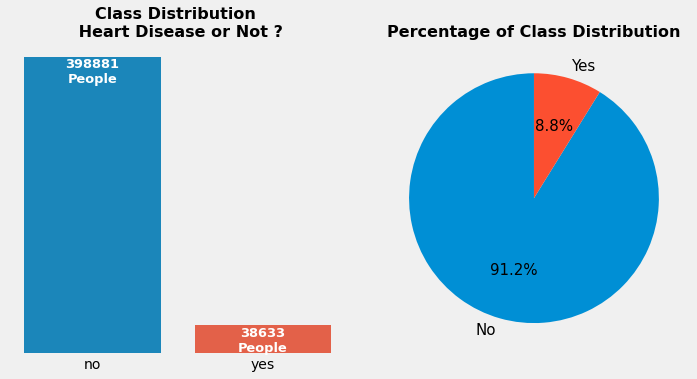

In [12]:
# set the size of figure
plt.figure(figsize=(20, 5))
# Countplot
plt.subplot(141);
ax = sns.countplot(x = df['HeartDiseaseorAttack'], order=df['HeartDiseaseorAttack'].value_counts().index);
plt.ylabel('');
plt.yticks([],[]);
plt.xlabel('');
plt.tight_layout();
plt.title('Class Distribution \n Heart Disease or Not ?', size = 16, weight = 'bold');

#Annotate bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f')+str('\nPeople'),
                  (bar.get_x() + bar.get_width()/2,
                   bar.get_height()), ha = 'center',
                   va = 'center', size = 13, xytext=(0,-15),
                   textcoords = 'offset points', color = 'w', 
                   weight = 'bold')
    
# Pie chart
plt.subplot(142);
df['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%1.1f%%',labels=['No','Yes'], 
                                        textprops={'fontsize': 15},
                                        startangle = 90);
plt.ylabel('');
plt.title('Percentage of Class Distribution', size = 16, weight = 'bold');

<font size='4.5'>**Summary :** </font> 

The class distribution *looks highly imbalanced*. The majority class is the people who don't have heart diseases, and the minority class is the people who have heart diseases. **The imbalanced class ratio is 1:10** which means that for every one person who has heart disease, there are 10 people who have not. Imbalanced class is common in the disease case.

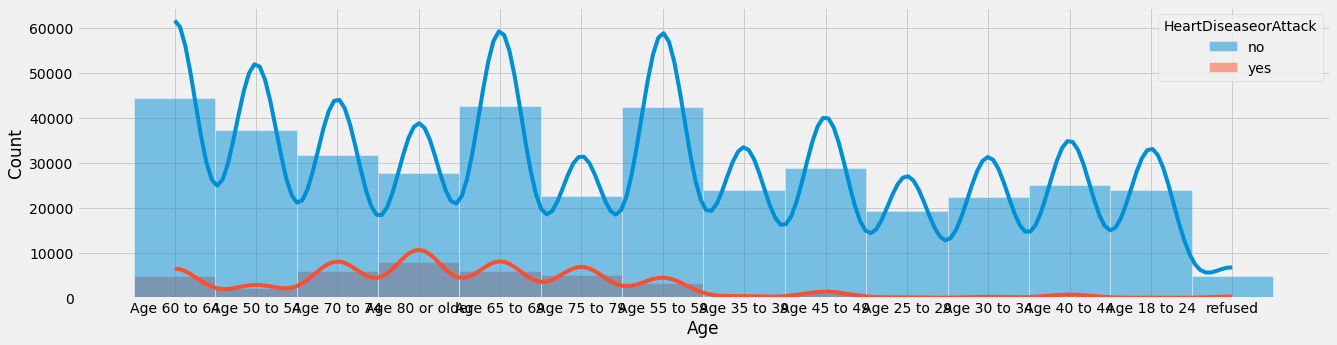

In [5]:
plt.figure(figsize=(20, 5));
sns.histplot(x =df['Age'], hue = df['HeartDiseaseorAttack'], kde=True);

## 1.6. Missing Values

In the beginning, we already defined a variable contains list of unexpected missing value *'n/a', 'na', '-', '?'*. Then after reviewed some features, we found that there are some values in categorical features which have similiar meaning with missing values, such as *refused, not sure, never checked*.

### 1.6.1. Actual missing values

In [13]:
# Get total missing values for each column
df.isna().sum().sort_values(ascending=False)

HighChol                58600
BMI                     35929
Smoker                  14039
DiffWalk                12149
Diabetes                    7
GenHlth                     2
PhysHlth                    1
HeartDiseaseorAttack        0
AnyHealthcare               0
Sex                         0
MentHlth                    0
Fruits                      0
HvyAlcoholConsump           0
Veggies                     0
HighBP                      0
PhysActivity                0
Stroke                      0
CholCheck                   0
Age                         0
dtype: int64

In [14]:
# Count total missing values for all observations
df.isna().sum().sum()

120727

In [15]:
# Get total observations contain missing values 
null_data = df[df.isna().any(axis=1)]
null_data.shape

(93907, 19)

In [16]:
# Percentage of observations that contain missing values
round(((null_data.shape[0] / df.shape[0]) * 100),2)

21.46

<font size='4.5'>**Summary :** </font> 

The total of **missing values is 120727** and the **total observations/rows contain missing values is 93907 or around 21%**. This means that there are some observations / rows include more than one missing values. Seven features include missing values. The highest total of missing values is in the feature `HighChol` around 13% observation and the lowest is in the feature `PhysHlth`. The amount is quite big. If we remove all the observations with missing values, we will lose a lot of information.

### 1.6.2. Actual missing values + similar values "refused, not sure, never checked"

In [17]:
# Making a list of unexpected missing value types
list_mv = ['n/a', 'na', '-', '?','refused', 'not sure', 'never checked', 77, 99 ]
# read dataset & create variable 'df' to initiate dataframe
df_check = pd.read_csv('heart_raw.csv', na_values = list_mv)

In [18]:
# Get total missing values for each column
df_check.isna().sum().sort_values(ascending=False)

CholCheck               64295
HighChol                61973
Veggies                 50292
Fruits                  43018
PhysActivity            37500
BMI                     35929
HvyAlcoholConsump       25340
Smoker                  17257
DiffWalk                14309
PhysHlth                 9419
MentHlth                 7146
Age                      5200
AnyHealthcare            1766
HighBP                   1232
GenHlth                  1190
Stroke                    989
Diabetes                  633
Sex                         0
HeartDiseaseorAttack        0
dtype: int64

In [19]:
# Count total missing values for all observations
df_check.isna().sum().sum()

377488

In [20]:
# Get total observations contain missing values 
null_data_check = df_check[df_check.isna().any(axis=1)]
null_data_check.shape

(148894, 19)

In [21]:
# Percentage of observations that contain missing values
round(((null_data_check.shape[0] / df_check.shape[0]) * 100),2)

34.03

<font size='4.5'>**Summary :** </font> 

If we define these values ('n/a', 'na', '-', '?','refused', 'not sure', 'never checked', 77, 99 ) as missing values, there are around 34% total observations/rows contain missing values.

## 1.7. Univariate Plots

### 1.7.1. Histogram Plot

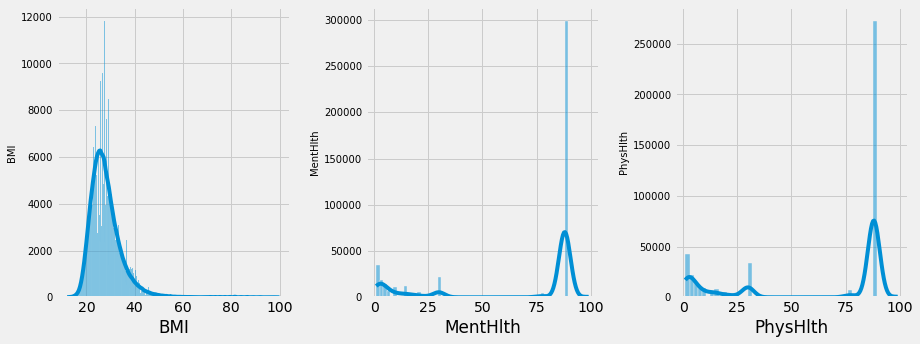

In [22]:
# Plot Histogram
plt.figure(figsize=(13,5))
for i in range(0,len(nums)):
    plt.subplot(1, 3, i+1)
    sns.histplot(x = df[nums[i]], kde = True)
    plt.ylabel(nums[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout()
    plt.savefig("histogram.png")

In [23]:
# Identify Skew
df[nums].skew()

BMI         2.249791
MentHlth   -0.938692
PhysHlth   -0.689249
dtype: float64

<font size='4.5'>**Summary :** </font> 

1. The distribution of BMI feature has right-skewed distribution .
2. Te distribution of `MentHlth` & `PhysHlth` **look affected by strange values**. They have negatively skewed distribution. We have to handle the  values which make the inappropriate distribution.

### 1.7.2. Boxplot 

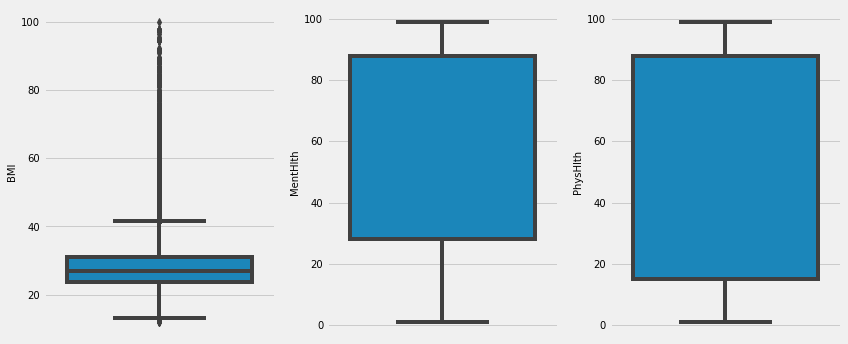

In [24]:
plt.figure(figsize=(12,5))
for i in range(0,len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[nums[i]])
    plt.ylabel(nums[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout()
    plt.savefig("box.png")

<font size='4.5'>**Summary :** </font> 

Boxplot is another way to identify the distribution of each attribute and able to identify the outlier values. The dots which are outside the whsiker indicate the presence of the outlier values. From the figure above, we can see that there is a large amount of outlier values in feature `BMI`, however boxplot doesn't detect the presence of outlier values in feature `MenHlth` & `PhysHlth`.

### 1.7.3. Count Plot - Categorical Feature

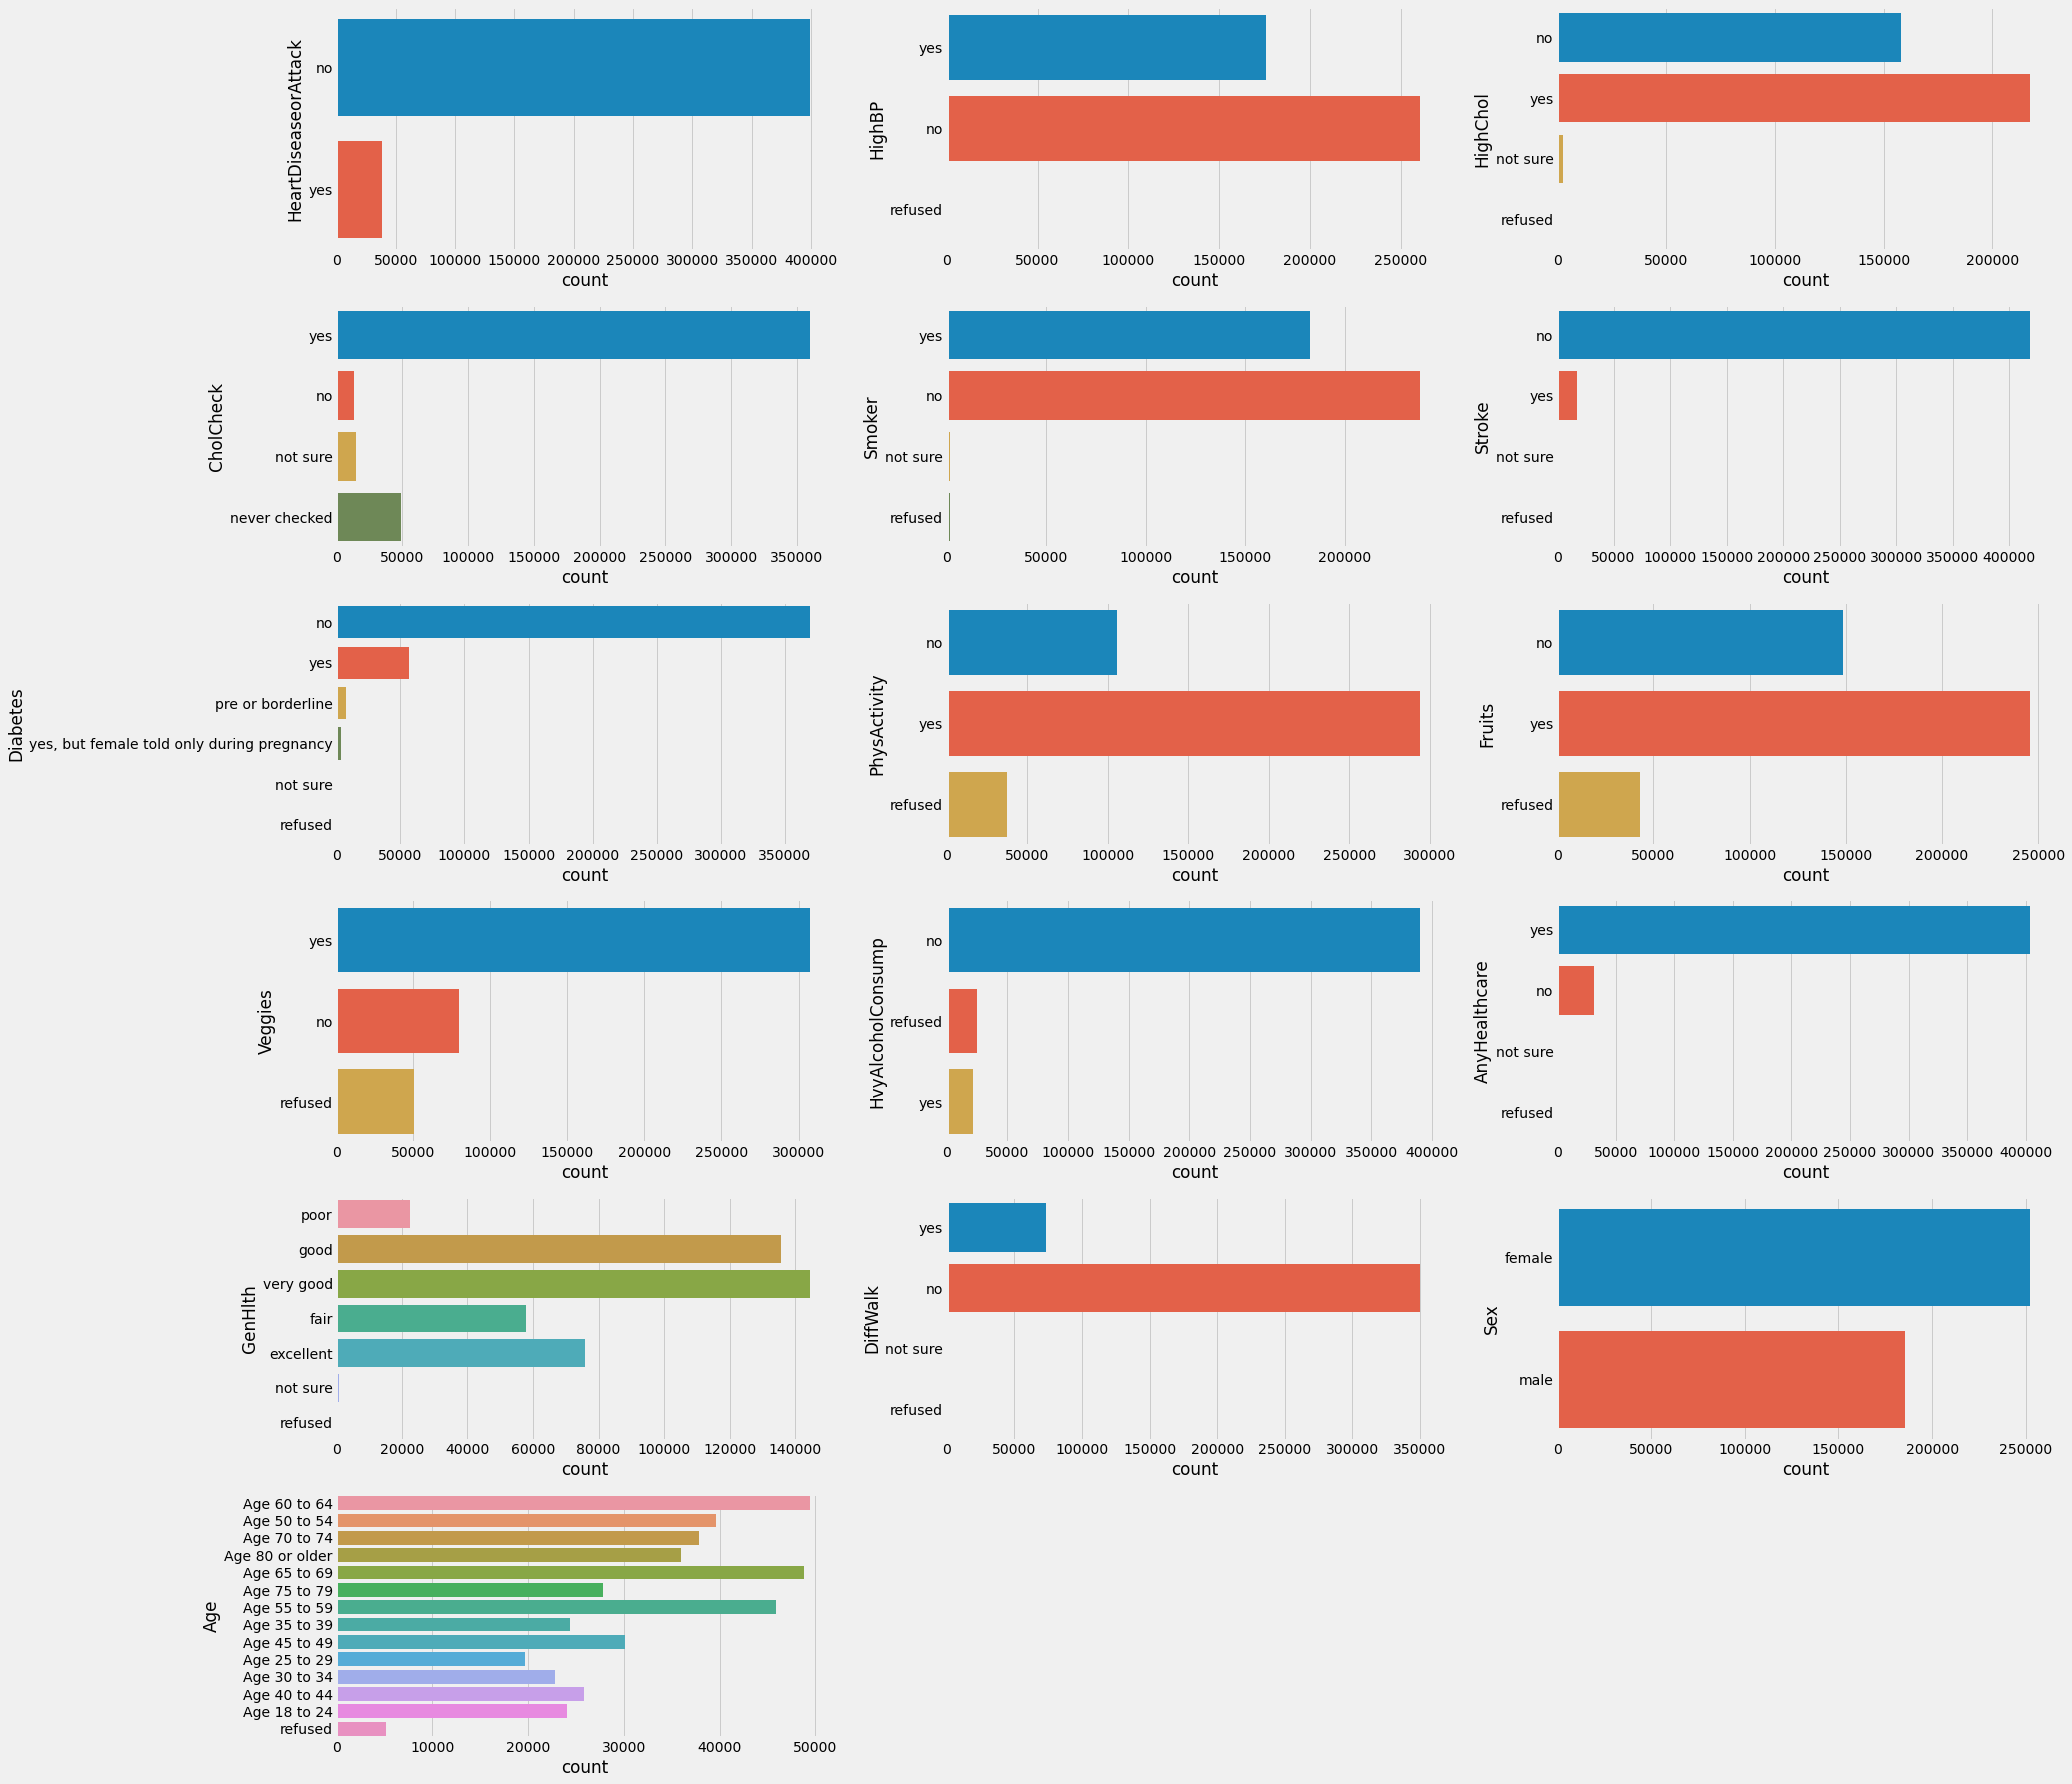

In [25]:
i = 1
plt.figure(figsize=(29,25))
for col in cats :
    plt.subplot(6,3,i);
    sns.countplot(y=df[col]);
    i+=1
    plt.tight_layout();
    plt.savefig("count.png")

<font size='4.5'>**Summary :** </font> 

we should handle some values to make it suitable with machine learning algorithm, such as *refused, not sure, never checked*

## 2. Data Pre-Processing

## 2.1. Data Pre-Processing 1

### 2.1.1. Copy the original dataframe for pre-processing

In [26]:
dp1 = df.copy()

### 2.1.2. Replace Value 88

In [27]:
''' 
Feature MentHlth and PhysHlth have 88 value which means no bad mental health days.
So it will convert to 0 that means 0 day.
'''
# change 88 to 0 
for col in ['MentHlth', 'PhysHlth']:
    dp1[col] = dp1[col].replace({88:0})

### 2.1.3. Handle Missing Value

In [28]:
# original shape
dp1.shape

(437514, 19)

In [29]:
# remove missing values
dp1.dropna(inplace=True)

In [30]:
# data shape after remove missing values
dp1.shape

(343607, 19)

In [31]:
'''
some columns have values that were not supposed to be there,
such as refuse, never checked, not sure, 77, 99. Based on the
description of each attribute, those values have the similar meaning 
with missing values. Now we area gonna check the total of these values
and distribution of the values in each attribute.
'''
# create the empty lists at first
refuse =[]
ns = []
nc = []
value_77 = []
value_99 = []

# looping through all attributes
for col in list(dp1.columns):
    rfs = dp1[dp1[col]== 'refused'].shape[0]
    nots = dp1[dp1[col]== 'not sure'].shape[0]
    nv = dp1[dp1[col]== 'never checked'].shape[0]
    v_77 = dp1[dp1[col]== 77].shape[0]
    v_99 = dp1[dp1[col]== 99].shape[0]
    
    # append the values to the lists
    refuse.append(rfs)
    ns.append(nots)
    nc.append(nv)
    value_77.append(v_77)
    value_99.append(v_99)

# print total each value in all attributes
print('Total refused value =', sum(refuse))
print('Total not sure value =', sum(ns))
print('Total never checked value =', sum(nc))
print('Total value 77 =', sum(value_77))
print('Total value 99 =', sum(value_99))

Total refused value = 75389
Total not sure value = 11547
Total never checked value = 0
Total value 77 = 8795
Total value 99 = 2907


In [32]:
'''
Total each value in each attribute does not make sense. 
We think because each attribute might have those values
or maybe some. That's why the total of each value in all attributes
look enormous. Let's see the distribution of each value in each attribute.
'''

# distribution of those values in each categorical column
strange_value = pd.DataFrame({
                    'refuse':refuse,
                    'not_sure':ns,
                    'never_checked':nc,
                    'value 77':value_77,
                    'value 99':value_99,
                    'attributes':dp1.columns.tolist()}).set_index('attributes')
strange_value

,refuse,not_sure,never_checked,value 77,value 99
attributes,,,,,
HeartDiseaseorAttack,0,0,0,0,0
HighBP,706,0,0,0,0
HighChol,287,2543,0,0,0
CholCheck,0,4604,0,0,0
BMI,0,0,0,0,0
Smoker,753,1335,0,0,0
Stroke,23,776,0,0,0
Diabetes,41,333,0,0,0
PhysActivity,16566,0,0,0,0


In [33]:
'''
Our hypothesis is true after see the dataframe above.
For first data pre-processing, we'll experiment with drop
all these values.
'''
# filter data frame
for col in list(dp1.columns):
    dp1 = dp1[dp1[col]!='refused']
    dp1 = dp1[dp1[col]!='not sure']
    dp1 = dp1[dp1[col]!='never checked']
    dp1 = dp1[dp1[col]!=77]
    dp1 = dp1[dp1[col]!=99]

In [34]:
dp1.shape

(288620, 19)

### 2.1.4. Handle Outlier

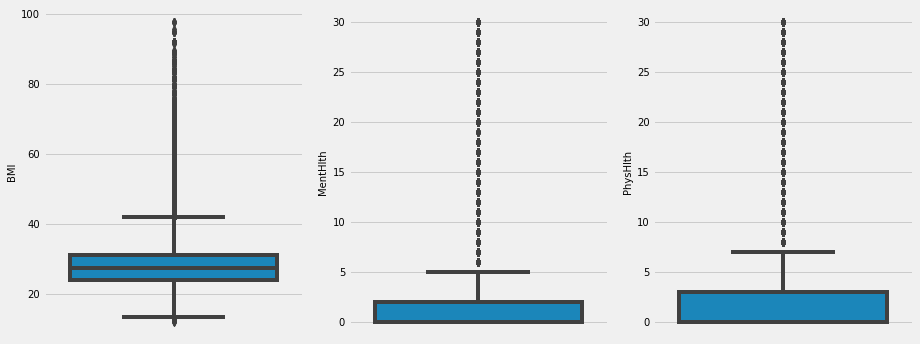

In [35]:
# Plot Boxplot
plt.figure(figsize=(13,5))
for i in range(0,len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = dp1[nums[i]])
    plt.ylabel(nums[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout()

In [36]:
# Identify outlier using IQR
for col in nums:
    
    # Calculate interquartile range 
    Q3, Q1 = np.percentile(dp1[col], [75 ,25])
    IQR = Q3-Q1
    
    # Define value 
    min_value = dp1[col].min()
    max_value = dp1[col].max()
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    
    # Identify low outlier

    if (min_value < lb):
        print('Low outlier is found in column ', col, '<', lb,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column ', col, len(list(dp1[dp1[col] < lb].index)),'\n')

    # Identify high outlier    
    elif (max_value > ub):
        print('High outlier is found in column ', col, '>', ub,'\n')
        #display total high outlier 
        print('Total of High Outlier in column ',col, ':', len(list(dp1[dp1[col] > ub].index)),'\n')
        
    else:
        print('Outlier is not found in column ', col,'\n')
        

Low outlier is found in column  BMI < 13.290000000000001 

Total of Low Outlier in column  BMI 29 

High outlier is found in column  MentHlth > 5.0 

Total of High Outlier in column  MentHlth : 40886 

High outlier is found in column  PhysHlth > 7.5 

Total of High Outlier in column  PhysHlth : 47318 



In [37]:
# removing outlier using IQR method in feature BMI & MentHlth
for col in ['BMI', 'MentHlth']:
    # Initiate Q1
    Q1 = dp1[col].quantile(0.25)
    # Initiate Q3
    Q3 = dp1[col].quantile(0.75)
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lb = Q1 - (IQR * 1.5)
    ub = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    dp1[col] = np.where(dp1[col] >= ub,
                         ub, dp1[col])
    dp1[col] = np.where(dp1[col] <= lb,
                         lb, dp1[col])

In [38]:
# shape after remove the outlier
dp1.shape

(288620, 19)

### 2.1.5. Normalization


In [ ]:
# Separate the features & the target
X1 = dp1.drop('HeartDiseaseorAttack',1)
y1 = dp1['HeartDiseaseorAttack']

# Split train & test data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,
                                                        test_size=0.30,
                                                        random_state=42,
                                                        stratify=y1)

NameError: name 'dp1' is not defined

In [40]:
# before scaling
X_train1[nums].describe()

,BMI,MentHlth,PhysHlth
count,202034.000000,202034.000000,202034.000000
mean,28.042884,1.162220,4.299093
std,5.592098,1.949077,8.786470
min,13.290000,0.000000,0.000000
25%,24.030000,0.000000,0.000000
50%,27.260000,0.000000,0.000000
75%,31.190000,2.000000,3.000000
max,41.930000,5.000000,30.000000


In [41]:
# Import library
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
'''
To prevent data leakage, never fit_transform on test data !!
'''
for col in nums :
    # Transform on Training Data
    X_train1[col] = scale.fit_transform(X_train1[col].to_numpy().reshape(-1,1))

    # Transform on Testing Data
    X_test1[col] = scale.transform(X_test1[col].to_numpy().reshape(-1,1))

In [42]:
# after scaling
X_train1[nums].describe()

,BMI,MentHlth,PhysHlth
count,202034.000000,202034.000000,202034.000000
mean,0.515115,0.232444,0.143303
std,0.195255,0.389815,0.292882
min,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000
50%,0.487779,0.000000,0.000000
75%,0.625000,0.400000,0.100000
max,1.000000,1.000000,1.000000


### 2.1.6. Transformation

In [43]:
# Skew value before transformation
print(X_train1[nums].skew())
print(X_test1[nums].skew())

BMI         0.659644
MentHlth    1.276708
PhysHlth    2.181166
dtype: float64
BMI         0.660191
MentHlth    1.295122
PhysHlth    2.170667
dtype: float64


All features in both training and test data have positively skewed distribution. Feature `MentHlth` & `PhysHlth` look highly skewed. We will try to apply log transformation to handle this.


In [44]:
# Apply log transformation on Train & Test Data
for col in nums:
    X_train1[col] = (X_train1[col]+1).apply(np.log)
    X_test1[col] = (X_test1[col]+1).apply(np.log)

In [45]:
# Skew value after transformation
print(X_train1[nums].skew())
print(X_test1[nums].skew())

BMI         0.354040
MentHlth    1.192549
PhysHlth    1.990529
dtype: float64
BMI         0.357050
MentHlth    1.209377
PhysHlth    1.981858
dtype: float64


We see that after doing the log transformation, skew values in all attributes decrease, but just affected a bit in feature MentHlth.

### 2.1.7. Categorical Encoding  
Most of attributes in our dataset consist of categorical attributes. It can cause high dimensionality data if we encode with one-hot encoding. Firstl we will try to convert attributes which have value yes or no to binary number. Then ordinal attributes will convert to ordered value. And feature Sex uses one-hot encoding.

In [46]:
# Identify all values of each feature for categorical data
for col in cats:
    print('Value count for column', col, ':')
    print(dp1[col].value_counts())
    print()

Value count for column HeartDiseaseorAttack :
no     260960
yes     27660
Name: HeartDiseaseorAttack, dtype: int64

Value count for column HighBP :
no     163665
yes    124955
Name: HighBP, dtype: int64

Value count for column HighChol :
yes    165556
no     123064
Name: HighChol, dtype: int64

Value count for column CholCheck :
yes    278020
no      10600
Name: CholCheck, dtype: int64

Value count for column Smoker :
no     161681
yes    126939
Name: Smoker, dtype: int64

Value count for column Stroke :
no     276570
yes     12050
Name: Stroke, dtype: int64

Value count for column Diabetes :
no                                            240477
yes                                            40569
pre or borderline                               5359
yes, but female told only during pregnancy      2215
Name: Diabetes, dtype: int64

Value count for column PhysActivity :
yes    217244
no      71376
Name: PhysActivity, dtype: int64

Value count for column Fruits :
yes    183621
no     10499

In [48]:
# Encode attributes with yes or no value to binary number
binary= ['HighBP', 'HighChol', 'CholCheck', 
          'Smoker', 'Stroke','PhysActivity', 'Fruits', 'Veggies',
          'HvyAlcoholConsump', 'AnyHealthcare','DiffWalk']
# looping to the column list in binary
for col in binary:
    X_train1[col] = X_train1[col].replace({'no':0,
                                 'yes':1})  
    X_test1[col] = X_test1[col].replace({'no':0,
                                 'yes':1}) 

In [49]:
# encode feature GenHlth to ordered value
X_train1['GenHlth'] = X_train1['GenHlth'].replace({'excellent':1,
                                         'very good':2,  
                                         'good':3,
                                         'fair':4,
                                         'poor':5})
X_test1['GenHlth'] = X_test1['GenHlth'].replace({'excellent':1,
                                         'very good':2,  
                                         'good':3,
                                         'fair':4,
                                         'poor':5})
        
# encode feature Age to ordered value
X_train1['Age'] = X_train1['Age'].replace({'Age 80 or older':13,
                                 'Age 75 to 79':12,
                                 'Age 70 to 74':11,
                                 'Age 65 to 69':10,
                                 'Age 60 to 64':9,
                                 'Age 55 to 59':8,
                                 'Age 50 to 54':7,
                                 'Age 45 to 49':6,
                                 'Age 40 to 44':5,
                                 'Age 35 to 39':4,       
                                 'Age 30 to 34':3,       
                                 'Age 25 to 29':2,        
                                 'Age 18 to 24':1}) 
X_test1['Age'] = X_test1['Age'].replace({'Age 80 or older':13,
                                 'Age 75 to 79':12,
                                 'Age 70 to 74':11,
                                 'Age 65 to 69':10,
                                 'Age 60 to 64':9,
                                 'Age 55 to 59':8,
                                 'Age 50 to 54':7,
                                 'Age 45 to 49':6,
                                 'Age 40 to 44':5,
                                 'Age 35 to 39':4,       
                                 'Age 30 to 34':3,       
                                 'Age 25 to 29':2,        
                                 'Age 18 to 24':1}) 
 
# encode feature Diabetes 
'''
Gestational diabetes is a condition in which your blood sugar levels become high during pregnancy.
Gestational diabetes goes away after you give birth. So we can say that this category doesn' have diabetes.
Source : https://www.webmd.com/diabetes/gestational-diabetes
'''
X_train1['Diabetes'] = X_train1['Diabetes'].replace({'no':0,
                                           'yes, but female told only during pregnancy':0,
                                           'pre or borderline':1,  
                                           'yes':2})                              
X_test1['Diabetes'] = X_test1['Diabetes'].replace({'no':0,
                                           'yes, but female told only during pregnancy':0,
                                           'pre or borderline':1,  
                                           'yes':2}) 


In [50]:
# encode target variable
y_train1= y_train1.replace({'no':0,
                                 'yes':1})  
y_test1= y_test1.replace({'no':0,
                                 'yes':1})  

In [51]:
# one hot encoding feature Sex

# train data
onehot_encode_tr = pd.get_dummies(X_train1['Sex'], prefix = 'Sex')
X_train1 = X_train1.join(onehot_encode_tr)
# drop all categorical columns & 'id, except product_importance_high
X_train1.drop('Sex',1, inplace = True)

# test data
onehot_encode_ts = pd.get_dummies(X_test1['Sex'], prefix = 'Sex')
X_test1 = X_test1.join(onehot_encode_ts)
# drop all categorical columns & 'id, except product_importance_high
X_test1.drop('Sex',1, inplace = True)

## 2.2. Data Pre-Processing 2

### 2.2.1. Copy the original dataframe for pre-processing

In [52]:
dp2 = df.copy()

### 2.2.2. Replace Value

In [53]:
''' 
Feature MentHlth and PhysHlth have 88 value which means no bad mental health days.
So it will convert to 0 that means 0 day.
'''
# change 88 to 0 
for col in ['MentHlth', 'PhysHlth']:
    dp2[col] = dp2[col].replace({88:0})

### 2.2.3. Handle Missing Value

In [54]:
# original shape
dp2.shape

(437514, 19)

In [55]:
# statistical imputation for given missing value "NaN"
col_mv_nums = ['BMI','PhysHlth']
col_mv_cats = ['HighChol','Smoker','DiffWalk','Diabetes','GenHlth']

for col in col_mv_nums:
    dp2[col] = dp2[col].fillna(dp2[col].median())
    
for col in col_mv_cats:
    dp2[col] = dp2[col].fillna(dp2[col].mode()[0])


#### 2.2.3.1. Imputation for strange value
    
some columns have values that were not supposed to be there,
such as refuse, never checked, not sure, 77, 99. 
Based on the description of each attribute, those values have the similar meaning 
with missing values. In this data pre-processing 2, we will try to handle with imputation. Let's see later whether it influences the model performance.

In [57]:
'''
some columns have values that were not supposed to be there,
such as refuse, never checked, not sure, 77, 99. Based on the
description of each attribute, those values have the similar meaning 
with missing values. Now we area gonna check the total of these values
and distribution of the values in each attribute.
'''
# create the empty lists at first
refused =[]
ns = []
nc = []
value_77 = []
value_99 = []

# looping through all attributes
for col in list(dp2.columns):
    rfs = dp2[dp2[col]== 'refused'].shape[0]
    nots = dp2[dp2[col]== 'not sure'].shape[0]
    nv = dp2[dp2[col]== 'never checked'].shape[0]
    v_77 = dp2[dp2[col]== 77].shape[0]
    v_99 = dp2[dp2[col]== 99].shape[0]
    
    # append the values to the lists
    refused.append(rfs)
    ns.append(nots)
    nc.append(nv)
    value_77.append(v_77)
    value_99.append(v_99)

# distribution of those values in each categorical column
strange_val = pd.DataFrame({
                    'refuse':refused,
                    'not_sure':ns,
                    'never_checked':nc,
                    'value 77':value_77,
                    'value 99':value_99,
                    'attributes':dp1.columns.tolist()}).set_index('attributes')
strange_val

,refuse,not_sure,never_checked,value 77,value 99
attributes,,,,,
HeartDiseaseorAttack,0,0,0,0,0
HighBP,1232,0,0,0,0
HighChol,462,2911,0,0,0
CholCheck,0,14978,49317,0,0
BMI,0,0,0,0,0
Smoker,1430,1788,0,0,0
Stroke,27,962,0,0,0
Diabetes,90,536,0,0,0
PhysActivity,37500,0,0,0,0


In [58]:
'''
We group those features based on the data types
to ease the imputation process
'''
# group the features based on the data types
mv_cats = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
           'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
           'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Age']
mv_nums = ['MentHlth', 'PhysHlth']

##### <font size='3'>**Numeric Imputation**

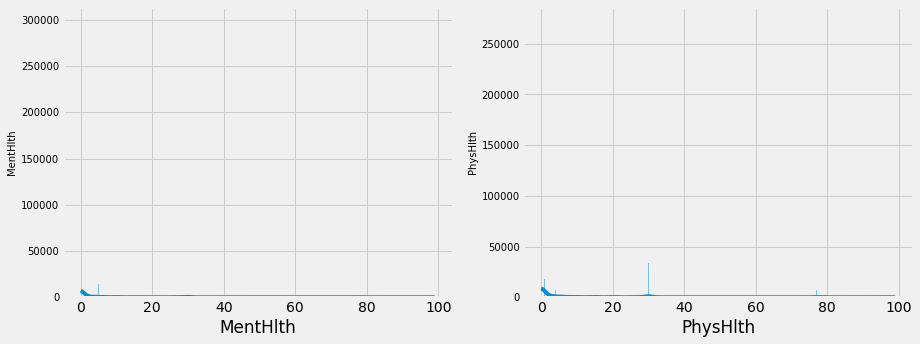

In [59]:
'''
We see the distribution first, to determine what imputation method
that we will use. If the distributions aren't normal. We're gonna use
median, because it's more robust than mean.
'''
plt.figure(figsize=(13,5))
for i in range(0,len(mv_nums)):
    plt.subplot(1, 2, i+1)
    sns.histplot(x = dp2[mv_nums[i]], kde = True)
    plt.ylabel(mv_nums[i],size=10)
    plt.yticks(size = 10)
   
    plt.tight_layout()

In [60]:
'''
impute value 77 & 99 using median,
because the distributions are skewed.
'''
for col in mv_nums:
    dp2[col].replace({77: np.median(dp2[col]),99: np.median(dp2[col])}, inplace=True)

##### <font size='3'>**Categorical Imputation**

In [61]:
from scipy.stats import mode

for col in mv_cats:
    dp2[col].replace({'refused':mode(dp2[col])[0]}, inplace=True)

In [62]:
for col in mv_cats:
    dp2[col].replace({'not sure':mode(dp2[col])[0]}, inplace=True)

In [63]:
for col in mv_cats:
    dp2[col].replace({'never checked':mode(dp2[col])[0]}, inplace=True)

In [64]:
# Check whether the imputation is success or not

# create the empty lists at first
refused =[]
ns = []
nc = []
value_77 = []
value_99 = []

# looping through all attributes
for col in list(dp2.columns):
    rfs = dp2[dp2[col]== 'refused'].shape[0]
    nots = dp2[dp2[col]== 'not sure'].shape[0]
    nv = dp2[dp2[col]== 'never checked'].shape[0]
    v_77 = dp2[dp2[col]== 77].shape[0]
    v_99 = dp2[dp2[col]== 99].shape[0]
    
    # append the values to the lists
    refused.append(rfs)
    ns.append(nots)
    nc.append(nv)
    value_77.append(v_77)
    value_99.append(v_99)

# distribution of those values in each categorical column
strange_val = pd.DataFrame({
                    'refuse':refused,
                    'not_sure':ns,
                    'never_checked':nc,
                    'value 77':value_77,
                    'value 99':value_99,
                    'attributes':dp1.columns.tolist()}).set_index('attributes')
strange_val

,refuse,not_sure,never_checked,value 77,value 99
attributes,,,,,
HeartDiseaseorAttack,0,0,0,0,0
HighBP,0,0,0,0,0
HighChol,0,0,0,0,0
CholCheck,0,0,0,0,0
BMI,0,0,0,0,0
Smoker,0,0,0,0,0
Stroke,0,0,0,0,0
Diabetes,0,0,0,0,0
PhysActivity,0,0,0,0,0


We can see that the imputations are successfully done

### 2.2.5. Handle Outliers

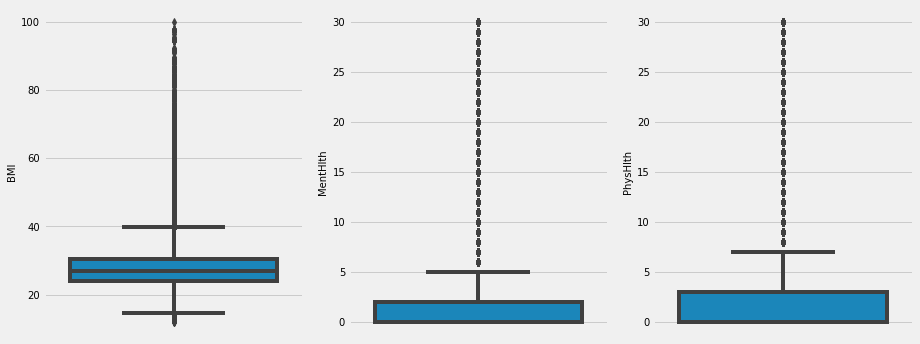

In [65]:
# Plot Boxplot
plt.figure(figsize=(13,5))
for i in range(0,len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = dp2[nums[i]])
    plt.ylabel(nums[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout()

In [66]:
# Identify outlier using IQR
for col in nums:
    
    # Calculate interquartile range 
    Q3, Q1 = np.percentile(dp2[col], [75 ,25])
    IQR = Q3-Q1
    
    # Define value 
    min_value = dp2[col].min()
    max_value = dp2[col].max()
    lb = Q1 - (1.5*IQR)
    ub = Q3 + (1.5*IQR)
    
    # Identify low outlier

    if (min_value < lb):
        print('Low outlier is found in column ', col, '<', lb,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column ', col, len(list(dp2[dp2[col] < lb].index)),'\n')

    # Identify high outlier    
    elif (max_value > ub):
        print('High outlier is found in column ', col, '>', ub,'\n')
        #display total high outlier 
        print('Total of High Outlier in column ',col, ':', len(list(dp2[dp2[col] > ub].index)),'\n')
        
    else:
        print('Outlier is not found in column ', col,'\n')

Low outlier is found in column  BMI < 14.61 

Total of Low Outlier in column  BMI 203 

High outlier is found in column  MentHlth > 5.0 

Total of High Outlier in column  MentHlth : 63943 

High outlier is found in column  PhysHlth > 7.5 

Total of High Outlier in column  PhysHlth : 69254 



In [68]:
# Handle outliers in BMI using IQR
# Initiate Q1
Q1 = dp2['BMI'].quantile(0.25)
# Initiate Q3
Q3 = dp2['BMI'].quantile(0.75)
# Initiate IQR
IQR = Q3 - Q1
# Initiate lower_bound & upper_bound 
lb = Q1 - (IQR * 1.5)
ub = Q3 + (IQR * 1.5)

# Filtering outlier & replace with upper_bound or lower_bound 
dp2['BMI'] = np.where(dp2['BMI'] >= ub,
                         ub, dp2['BMI'])
dp2['BMI'] = np.where(dp2['BMI'] <= lb,
                         lb, dp2['BMI'])

In [70]:
# Capping outliers using IQR method in feature MentHlth, & PhysHlth
for col in ['MentHlth','PhysHlth']:
    # Initiate Q1
    Q1 = dp2[col].quantile(0.25)
    # Initiate Q3
    Q3 = dp2[col].quantile(0.90) # use percentile 90% since there are only outliers in upper bound
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lb = Q1 - (IQR * 1.5)
    ub = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    dp2[col] = np.where(dp2[col] >= ub,
                         ub, dp2[col])
    dp2[col] = np.where(dp2[col] <= lb,
                         lb, dp2[col])

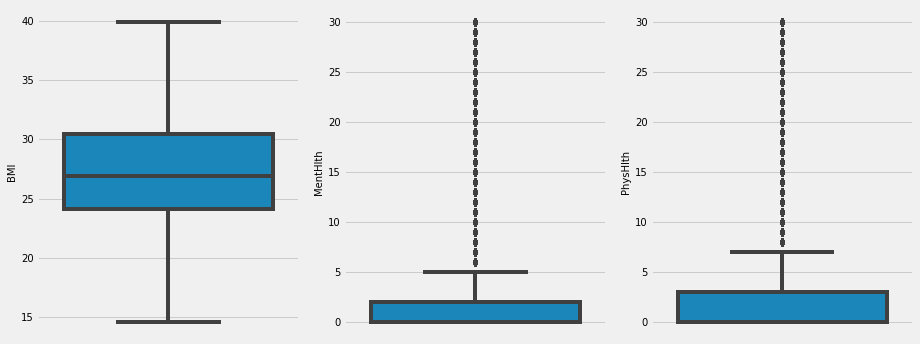

In [72]:
# Plot Boxplot after remove the outliers
plt.figure(figsize=(13,5))
for i in range(0,len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = dp2[nums[i]])
    plt.ylabel(nums[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout()

We can see that there are some outliers in both feature MentHlth and PhysHlth, since we capping the outliers in percentile 90%.

### 2.2.7. Create a copy of dp2 cleaned

In [74]:
dp2_cl = dp2.copy()

### 2.2.6. Normalization

In [75]:
# Separate the features & the target
X2 = dp2_cl.drop('HeartDiseaseorAttack',1)
y2 = dp2_cl['HeartDiseaseorAttack']

# Split train & test data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                        test_size=0.30,
                                                        random_state=42,
                                                        stratify=y2)

In [76]:
# Import library
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
'''
To prevent data leakage, never fit_transform on test data !!
'''
for col in nums :
    # Transform on Training Data
    X_train2[col] = scale.fit_transform(X_train2[col].to_numpy().reshape(-1,1))

    # Transform on Testing Data
    X_test2[col] = scale.transform(X_test2[col].to_numpy().reshape(-1,1))

### 2.2.7. Transformation

In [77]:
# Skew value before transformation
print(X_train2[nums].skew())
print(X_test2[nums].skew())

BMI         0.592270
MentHlth    2.669921
PhysHlth    2.232302
dtype: float64
BMI         0.596508
MentHlth    2.682456
PhysHlth    2.233712
dtype: float64


In [78]:
# Apply log transformation on Train & Test Data
for col in nums:
    X_train2[col] = (X_train2[col]+1).apply(np.log)
    X_test2[col] = (X_test2[col]+1).apply(np.log)

In [79]:
# Skew value after transformation
print(X_train2[nums].skew())
print(X_test2[nums].skew())

BMI         0.253036
MentHlth    2.414678
PhysHlth    2.042021
dtype: float64
BMI         0.256912
MentHlth    2.424842
PhysHlth    2.042877
dtype: float64


### 2.2.8. Categorical Encoding - One Hot Encoding

In [80]:
# Encode attributes with yes or no value to binary number
binary= ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke',
         'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 
         'AnyHealthcare','DiffWalk']
# looping to the column list in binary
for col in binary:
    X_train2[col] = X_train2[col].replace({'no':0,
                                 'yes':1})  
    X_test2[col] = X_test2[col].replace({'no':0,
                                 'yes':1}) 

In [81]:
# encode feature GenHlth to ordered value
X_train2['GenHlth'] = X_train2['GenHlth'].replace({'excellent':1,
                                         'very good':2,  
                                         'good':3,
                                         'fair':4,
                                         'poor':5})
X_test2['GenHlth'] = X_test2['GenHlth'].replace({'excellent':1,
                                         'very good':2,  
                                         'good':3,
                                         'fair':4,
                                         'poor':5})
        
# encode feature Age to ordered value
X_train2['Age'] = X_train2['Age'].replace({'Age 80 or older':13,
                                 'Age 75 to 79':12,
                                 'Age 70 to 74':11,
                                 'Age 65 to 69':10,
                                 'Age 60 to 64':9,
                                 'Age 55 to 59':8,
                                 'Age 50 to 54':7,
                                 'Age 45 to 49':6,
                                 'Age 40 to 44':5,
                                 'Age 35 to 39':4,       
                                 'Age 30 to 34':3,       
                                 'Age 25 to 29':2,        
                                 'Age 18 to 24':1}) 
X_test2['Age'] = X_test2['Age'].replace({'Age 80 or older':13,
                                 'Age 75 to 79':12,
                                 'Age 70 to 74':11,
                                 'Age 65 to 69':10,
                                 'Age 60 to 64':9,
                                 'Age 55 to 59':8,
                                 'Age 50 to 54':7,
                                 'Age 45 to 49':6,
                                 'Age 40 to 44':5,
                                 'Age 35 to 39':4,       
                                 'Age 30 to 34':3,       
                                 'Age 25 to 29':2,        
                                 'Age 18 to 24':1}) 
 
# encode feature Diabetes 
'''
Gestational diabetes is a condition in which your blood sugar levels become high during pregnancy.
Gestational diabetes goes away after you give birth. So we can say that this category doesn' have diabetes.
Source : https://www.webmd.com/diabetes/gestational-diabetes
'''
X_train2['Diabetes'] = X_train2['Diabetes'].replace({'no':0,
                                           'yes, but female told only during pregnancy':0,
                                           'pre or borderline':1,  
                                           'yes':2})                              
X_test2['Diabetes'] = X_test2['Diabetes'].replace({'no':0,
                                           'yes, but female told only during pregnancy':0,
                                           'pre or borderline':1,  
                                           'yes':2}) 


In [82]:
# encode target variable
y_train2= y_train2.replace({'no':0,
                                 'yes':1})  
y_test2= y_test2.replace({'no':0,
                                 'yes':1})  

In [83]:
# one hot encoding feature Sex

# train data
onehot_encode_tr2 = pd.get_dummies(X_train2['Sex'], prefix = 'Sex')
X_train2 = X_train2.join(onehot_encode_tr2)
# drop all categorical columns & 'id, except product_importance_high
X_train2.drop('Sex',1, inplace = True)

# test data
onehot_encode_ts2 = pd.get_dummies(X_test2['Sex'], prefix = 'Sex')
X_test2 = X_test2.join(onehot_encode_ts2)
# drop all categorical columns & 'id, except product_importance_high
X_test2.drop('Sex',1, inplace = True)

## 2.3. Data Pre-Processing 3

In [84]:
dp3 = dp2.copy() # dp2 cleaned

### 2.3.1. Categorical Encoding

In [85]:
dp3['Sex'] = dp3['Sex'].replace({'name':'male'})

In [86]:
# Encode attributes with yes or no value to binary number
binary= ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke',
         'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 
         'AnyHealthcare','DiffWalk','HeartDiseaseorAttack']
# looping to the column list in binary
for col in binary:
    dp3[col] = dp3[col].replace({'no':0,
                                 'yes':1})  

In [87]:
# encode feature GenHlth to ordered value
dp3['GenHlth'] = dp3['GenHlth'].replace({'excellent':1,
                                         'very good':2,  
                                         'good':3,
                                         'fair':4,
                                         'poor':5})
        
# encode feature Age to ordered value
dp3['Age'] = dp3['Age'].replace({'Age 80 or older':13,
                                 'Age 75 to 79':12,
                                 'Age 70 to 74':11,
                                 'Age 65 to 69':10,
                                 'Age 60 to 64':9,
                                 'Age 55 to 59':8,
                                 'Age 50 to 54':7,
                                 'Age 45 to 49':6,
                                 'Age 40 to 44':5,
                                 'Age 35 to 39':4,       
                                 'Age 30 to 34':3,       
                                 'Age 25 to 29':2,        
                                 'Age 18 to 24':1})  
 
# encode feature Diabetes 
'''
Gestational diabetes is a condition in which your blood sugar levels become high during pregnancy.
Gestational diabetes goes away after you give birth. So we can say that this category doesn' have diabetes.
Source : https://www.webmd.com/diabetes/gestational-diabetes
'''
dp3['Diabetes'] = dp3['Diabetes'].replace({'no':0,
                                           'yes, but female told only during pregnancy':0,
                                           'pre or borderline':1,  
                                           'yes':2})                              

In [88]:
# one hot encoding feature Sex
onehot_encode = pd.get_dummies(dp3['Sex'], prefix = 'Sex')
dp3 = dp3.join(onehot_encode)
# drop sex
dp3.drop('Sex',1, inplace = True)

### 2.3.2. Resampling method for imbalanced data

In [89]:
'''
sampling method does not support categorical,
so we encode the categorical data first
'''
# Separate the features & the target
X3 = dp3.drop('HeartDiseaseorAttack',1)
y3 = dp3['HeartDiseaseorAttack']

In [90]:
# before resampling method
print(X3.shape)
print(y3.shape)

(437514, 19)
(437514,)


In [91]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X3, y3)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X3, y3)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X3, y3)

In [92]:
print(pd.Series(y3).value_counts()) # original
print(pd.Series(y_under).value_counts()) # under sampling
print(pd.Series(y_over).value_counts()) # over sampling
print(pd.Series(y_over_SMOTE).value_counts()) # SMOTE

0    398881
1     38633
Name: HeartDiseaseorAttack, dtype: int64
0    77266
1    38633
Name: HeartDiseaseorAttack, dtype: int64
0    398881
1    199440
Name: HeartDiseaseorAttack, dtype: int64
0    398881
1    398881
Name: HeartDiseaseorAttack, dtype: int64


### 2.3.3. Split Feature & Target

In [93]:
# Split train & test data with under sampling method
from sklearn.model_selection import train_test_split
X_train3_us, X_test3_us, y_train3_us, y_test3_us = train_test_split(X_under, y_under,
                                                        test_size=0.30,
                                                        random_state=42)


# Split train & test data with over sampling method
from sklearn.model_selection import train_test_split
X_train3_os, X_test3_os, y_train3_os, y_test3_os = train_test_split(X_over, y_over,
                                                        test_size=0.30,
                                                        random_state=42)

# Split train & test data with SMOTE method
from sklearn.model_selection import train_test_split
X_train3_smt, X_test3_smt, y_train3_smt, y_test3_smt = train_test_split(X_over_SMOTE, y_over_SMOTE,
                                                        test_size=0.30,
                                                        random_state=42)

### 2.3.4. Normalization

In [94]:
# Import library
scale = MinMaxScaler()
'''
To prevent data leakage, never fit_transform on test data !!
'''
for col in nums :
    # Transform on Training Data
    X_train3_us[col] = scale.fit_transform(X_train3_us[col].to_numpy().reshape(-1,1))
    X_train3_os[col] = scale.fit_transform(X_train3_os[col].to_numpy().reshape(-1,1))
    X_train3_smt[col] = scale.fit_transform(X_train3_smt[col].to_numpy().reshape(-1,1))

    # Transform on Testing Data
    X_test3_us[col] = scale.transform(X_test3_us[col].to_numpy().reshape(-1,1))
    X_test3_os[col] = scale.transform(X_test3_os[col].to_numpy().reshape(-1,1))
    X_test3_smt[col] = scale.transform(X_test3_smt[col].to_numpy().reshape(-1,1))

### 2.3.5. Transformation

In [95]:
# Skew value before transformation

print('-----Under Sampling Method-----\n')
print('--Train Data--')
print(X_train3_us[nums].skew())
print('--Test Data--')
print(X_test3_us[nums].skew(),'\n')

print('-----Over Sampling Method-----\n')
print('--Train Data--')
print(X_train3_os[nums].skew(),'\n')
print('--Test Data--')
print(X_test3_os[nums].skew(),'\n')

print('-----SMOTE Method-----\n')
print('--Train Data--')
print(X_train3_smt[nums].skew(),'\n')
print('--Test Data--')
print(X_test3_smt[nums].skew())

-----Under Sampling Method-----

--Train Data--
BMI         0.549786
MentHlth    2.462551
PhysHlth    1.737713
dtype: float64
--Test Data--
BMI         0.530313
MentHlth    2.434431
PhysHlth    1.750981
dtype: float64 

-----Over Sampling Method-----

--Train Data--
BMI         0.541237
MentHlth    2.451911
PhysHlth    1.746524
dtype: float64 

--Test Data--
BMI         0.53665
MentHlth    2.42890
PhysHlth    1.72581
dtype: float64 

-----SMOTE Method-----

--Train Data--
BMI         0.515498
MentHlth    2.317833
PhysHlth    1.491891
dtype: float64 

--Test Data--
BMI         0.515076
MentHlth    2.315578
PhysHlth    1.488105
dtype: float64


In [96]:
# Apply log transformation on Train & Test Data
for col in nums:
    X_train3_us[col] = (X_train3_us[col]+1).apply(np.log)
    X_train3_os[col] = (X_train3_os[col]+1).apply(np.log)
    X_train3_smt[col] = (X_train3_smt[col]+1).apply(np.log)
    
    X_test3_us[col] = (X_test3_us[col]+1).apply(np.log)
    X_test3_os[col] = (X_test3_os[col]+1).apply(np.log)
    X_test3_smt[col] = (X_test3_smt[col]+1).apply(np.log)

In [97]:
# Skew value after transformation

print('-----Under Sampling Method-----\n')
print('--Train Data--')
print(X_train3_us[nums].skew())
print('--Test Data--')
print(X_test3_us[nums].skew(),'\n')

print('-----Over Sampling Method-----\n')
print('--Train Data--')
print(X_train3_os[nums].skew(),'\n')
print('--Test Data--')
print(X_test3_os[nums].skew(),'\n')

print('-----SMOTE Method-----\n')
print('--Train Data--')
print(X_train3_smt[nums].skew(),'\n')
print('--Test Data--')
print(X_test3_smt[nums].skew())

-----Under Sampling Method-----

--Train Data--
BMI         0.213352
MentHlth    2.239683
PhysHlth    1.587366
dtype: float64
--Test Data--
BMI         0.198156
MentHlth    2.215585
PhysHlth    1.596562
dtype: float64 

-----Over Sampling Method-----

--Train Data--
BMI         0.205968
MentHlth    2.229344
PhysHlth    1.593829
dtype: float64 

--Test Data--
BMI         0.202450
MentHlth    2.208418
PhysHlth    1.574762
dtype: float64 

-----SMOTE Method-----

--Train Data--
BMI         0.184934
MentHlth    2.114103
PhysHlth    1.353807
dtype: float64 

--Test Data--
BMI         0.181789
MentHlth    2.112520
PhysHlth    1.350329
dtype: float64


## 3. Machine Learning Modelling & Evaluation

In [98]:
# Create function to fit & evaluation the model

# Machine learning algorithm library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Metrics Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import RocCurveDisplay, plot_confusion_matrix, roc_auc_score, classification_report

# create model evaluation function
def model_evaluation(X_train, y_train, X_test, y_test):
    
    # Algorithms
    lr = LogisticRegression(random_state=42)     # define logistic regression 
    rf = RandomForestClassifier(random_state=42) # define Random Forest Classifier

    
    # Fit train data
    lr.fit(X_train, y_train) 
    rf.fit(X_train, y_train) 

    
    # Predict the response for a new observation
    y_pred_lr= lr.predict(X_test) 
    y_pred_rf= rf.predict(X_test)
    
    # metrics evaluation
    
    # Precision
    prec_lr = round(precision_score(y_test, y_pred_lr),3)
    prec_rf = round(precision_score(y_test, y_pred_rf),3)

    # Recall
    recall_lr= round(recall_score(y_test, y_pred_lr),3)
    recall_rf= round(recall_score(y_test, y_pred_rf),3)

    # ROC_AUC
    roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr),3)
    fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr, pos_label=1)

    roc_auc_rf = round(roc_auc_score(y_test, y_pred_rf),3)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf, pos_label=1)
    
    # creating a dataframe
    algorithms = ['Logistic Regression',
                  'Random Forest']
    precision = [prec_lr, prec_rf]
    recall = [recall_lr, recall_rf]
    auc = [roc_auc_lr, roc_auc_rf]
    
    model_comparison = pd.DataFrame(
                         data=[algorithms, precision, recall, auc]).T.rename(
                                                                              {0:'Model',
                                                                               1:'Precision',
                                                                               2:'Recall',
                                                                               3:'AUC'}, axis=1)
    
    # plot metrics evaluation 
    fig, axes = plt.subplots(3,2, figsize=(28,33))
    
    
    # Precision Plot
    prec = sns.barplot(ax=axes[0,0], data = model_comparison, 
                      x = 'Precision', y = 'Model');
    # Annotate scores in bar
    for p in prec.patches:
        value = format(p.get_width(), '.3f') 
        x = p.get_x() + p.get_width() 
        y = p.get_y()-0.1 + p.get_height() / 2 
        prec.annotate(value, (x, y), size = 20, weight='bold')
    axes[0,0].set_xlabel('')   
    axes[0,0].set_ylabel('') 
    axes[0,0].grid(False) 
    axes[0,0].xaxis.set_ticklabels([])
    axes[0,0].tick_params(axis='both', which='major', labelsize=17)
    axes[0,0].set_title('Precision') 
    
    
    # Recall Plot
    rcl = sns.barplot(ax=axes[0,1], data = model_comparison, 
                      x = 'Recall', y = 'Model');
    # Annotate scores in bar
    for p in rcl.patches:
        value = format(p.get_width(), '.3f') 
        x = p.get_x() + p.get_width() 
        y = p.get_y()-0.1 + p.get_height() / 2 
        rcl.annotate(value, (x, y), size = 20, weight='bold')
    axes[0,1].set_xlabel('')   # Hide x-axis label
    axes[0,1].set_ylabel('')   # Hide y-axis label
    axes[0,1].grid(False)      # Hide grid lines
    axes[0,1].xaxis.set_ticklabels([]) # Hide x-axis ticks label
    axes[0,1].tick_params(axis='both', which='major', labelsize=17) # Set font size x and y axis ticks
    axes[0,1].set_title('Recall') 
                      
    # AUC Plot
    AUC = sns.barplot(ax=axes[1,0], data = model_comparison, 
                      x = 'AUC', y = 'Model');
    for p in AUC.patches:
        value = format(p.get_width(), '.3f') 
        x = p.get_x() + p.get_width() 
        y = p.get_y()-0.1 + p.get_height() / 2 
        AUC.annotate(value, (x, y), size = 20, weight='bold')
    axes[1,0].set_xlabel('')   
    axes[1,0].set_ylabel('') 
    axes[1,0].grid(False) 
    axes[1,0].xaxis.set_ticklabels([])
    axes[1,0].tick_params(axis='both', which='major', labelsize=17)
    axes[1,0].set_title('AUC Score') 
    
    # Plot ROC Curve
    RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc = roc_auc_lr,
                    estimator_name='Logistic Regression').plot(ax=axes[1,1])              
    RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc = roc_auc_rf,
                    estimator_name='Random Forest').plot(ax=axes[1,1])               
    axes[1,1].plot([0, 1], [0, 1], "k--")
    axes[1,1].set_title('ROC Curve')
    
    plot_confusion_matrix(lr, X_test, y_test, ax=axes[2,0], cmap='Reds')
    axes[2,0].set_title('Confusion Matrix LR')
    axes[2,0].grid(False)
   
    plot_confusion_matrix(rf, X_test, y_test, ax=axes[2,1], cmap='Reds')
    axes[2,1].set_title('Confusion Matrix RF')
    axes[2,1].grid(False)

## 3.1. Experiment 1

### 3.1.1. Default Parameter

CPU times: user 19.2 s, sys: 3.69 s, total: 22.9 s
Wall time: 14.5 s


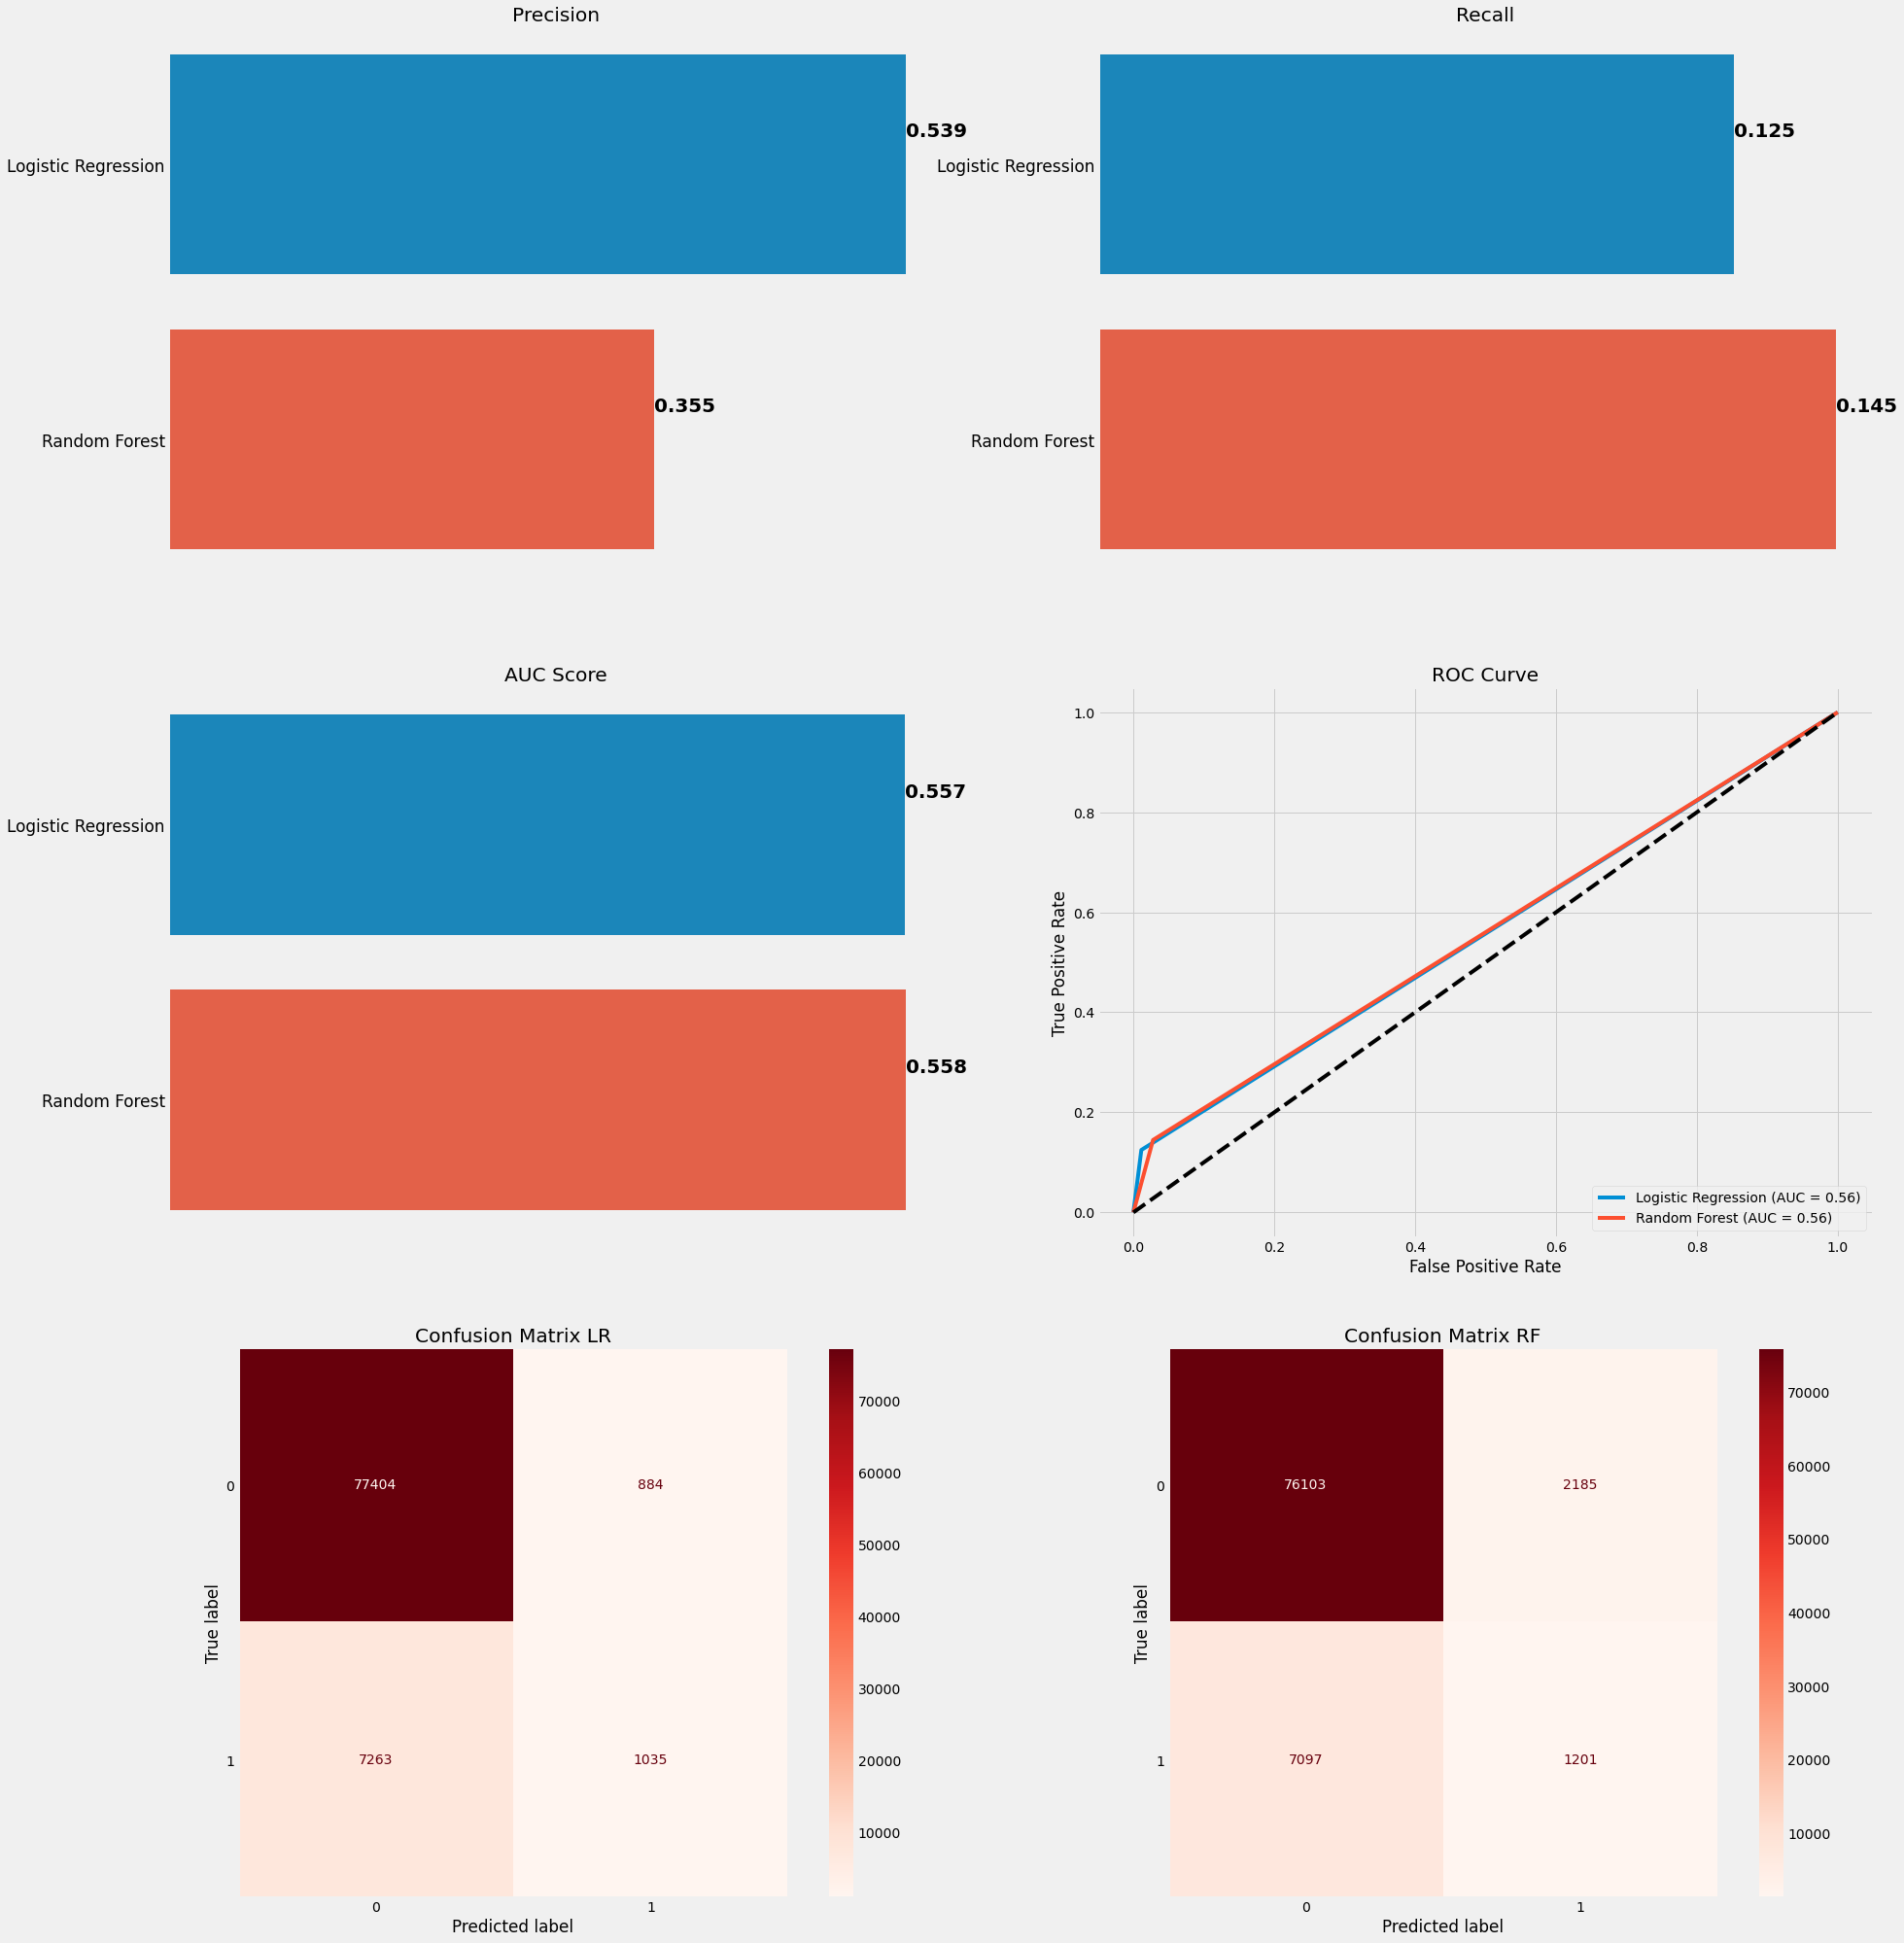

In [100]:
%%time
model_evaluation(X_train1, y_train1, X_test1, y_test1)
plt.savefig('exp11.png', bbox_inches='tight')

### 3.1.2 Hyperparameter Tuning

In [100]:
from sklearn.model_selection import RandomizedSearchCV
# create a function for hyperparameters tuning
def hyperparameter_lr(X_train, y_train, X_test, y_test):
    # Parameter to be tuned
    penalty = ['l2','l1'] # type of regularization
    C = [0.0001, 0.001, 0.01] # Inverse of regularization strength; smaller values specify stronger regularization.
    parameters = dict(penalty=penalty, C=C)
    # initiate the model
    model = RandomizedSearchCV(LogisticRegression(random_state=42), parameters, cv=10, random_state=42)
    # fit the model
    model.fit(X_train, y_train)
    # test the model
    y_pred = model.predict(X_test)
    # metrics evaluation
    prec = round(precision_score(y_test, y_pred),3)
    recall= round(recall_score(y_test, y_pred),3)
    auc = round(roc_auc_score(y_test, y_pred),3)
    print('Best parameters : ',model.best_params_)
    print('Precision = ',prec)
    print('Recall = ',recall)
    print('AUC = ',auc)
    
    plt.figure(figsize=(12,10))
    plot_confusion_matrix(model, X_test, y_test, cmap='Reds')
    plt.grid(False)
    plt.savefig('hyp_lr.png', bbox_inches='tight')
    
# create a function for hyperparameters tuning
def hyperparameter_rf(X_train, y_train, X_test, y_test):
    # Number of trees in random forest
    n_estimators = [100, 500,1000]
    #Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of level in tree
    max_depth = [1,3,8,10] 
    # Minimum number of samples required to split a node
    min_samples_split = [2,5,10] 
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [2,5,10]

    # Initiate hyperparameters
    parameters_rf = dict(n_estimators=n_estimators, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       max_depth=max_depth)
    # initiate the model
    model = RandomizedSearchCV(RandomForestClassifier(random_state=42), parameters_rf, cv=10)
    # fit the model
    model.fit(X_train, y_train)
    # test the model
    y_pred = model.predict(X_test)
    # metrics evaluation
    prec = round(precision_score(y_test, y_pred),3)
    recall= round(recall_score(y_test, y_pred),3)
    auc = round(roc_auc_score(y_test, y_pred),3)
    print('Best parameters : ',model.best_params_)
    print('Precision = ',prec)
    print('Recall = ',recall)
    print('AUC = ',auc)
    
    plt.figure(figsize=(12,10))
    plot_confusion_matrix(model, X_test, y_test, cmap='Reds')
    plt.grid(False)
    plt.savefig('hyp_rf.png', bbox_inches='tight')

Best parameters :  {'penalty': 'l2', 'C': 0.001}
Precision =  0.554
Recall =  0.091
AUC =  0.541
CPU times: user 1min 11s, sys: 35.9 s, total: 1min 47s
Wall time: 14.7 s


<Figure size 864x720 with 0 Axes>

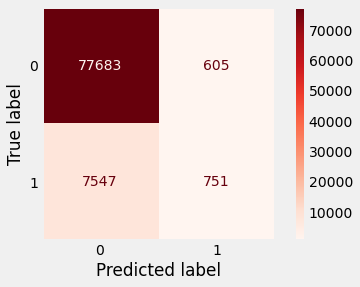

In [102]:
%%time
# Apply function for Logistic Regression
hyperparameter_lr(X_train1, y_train1, X_test1, y_test1)
plt.savefig('LR_Hyp1.png', bbox_inches='tight')

Best parameters :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
Precision =  0.629
Recall =  0.056
AUC =  0.526
CPU times: user 17min 28s, sys: 15.8 s, total: 17min 44s
Wall time: 17min 46s


<Figure size 864x720 with 0 Axes>

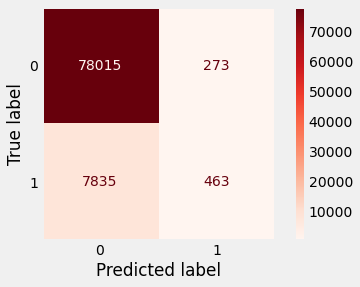

In [134]:
%%time
# Apply function for Random Forest
hyperparameter_rf(X_train1, y_train1, X_test1, y_test1)
plt.savefig('RF_Hyp1.png', bbox_inches='tight')

## 3.2. Experiment 2

CPU times: user 28.2 s, sys: 3.34 s, total: 31.6 s
Wall time: 23.5 s


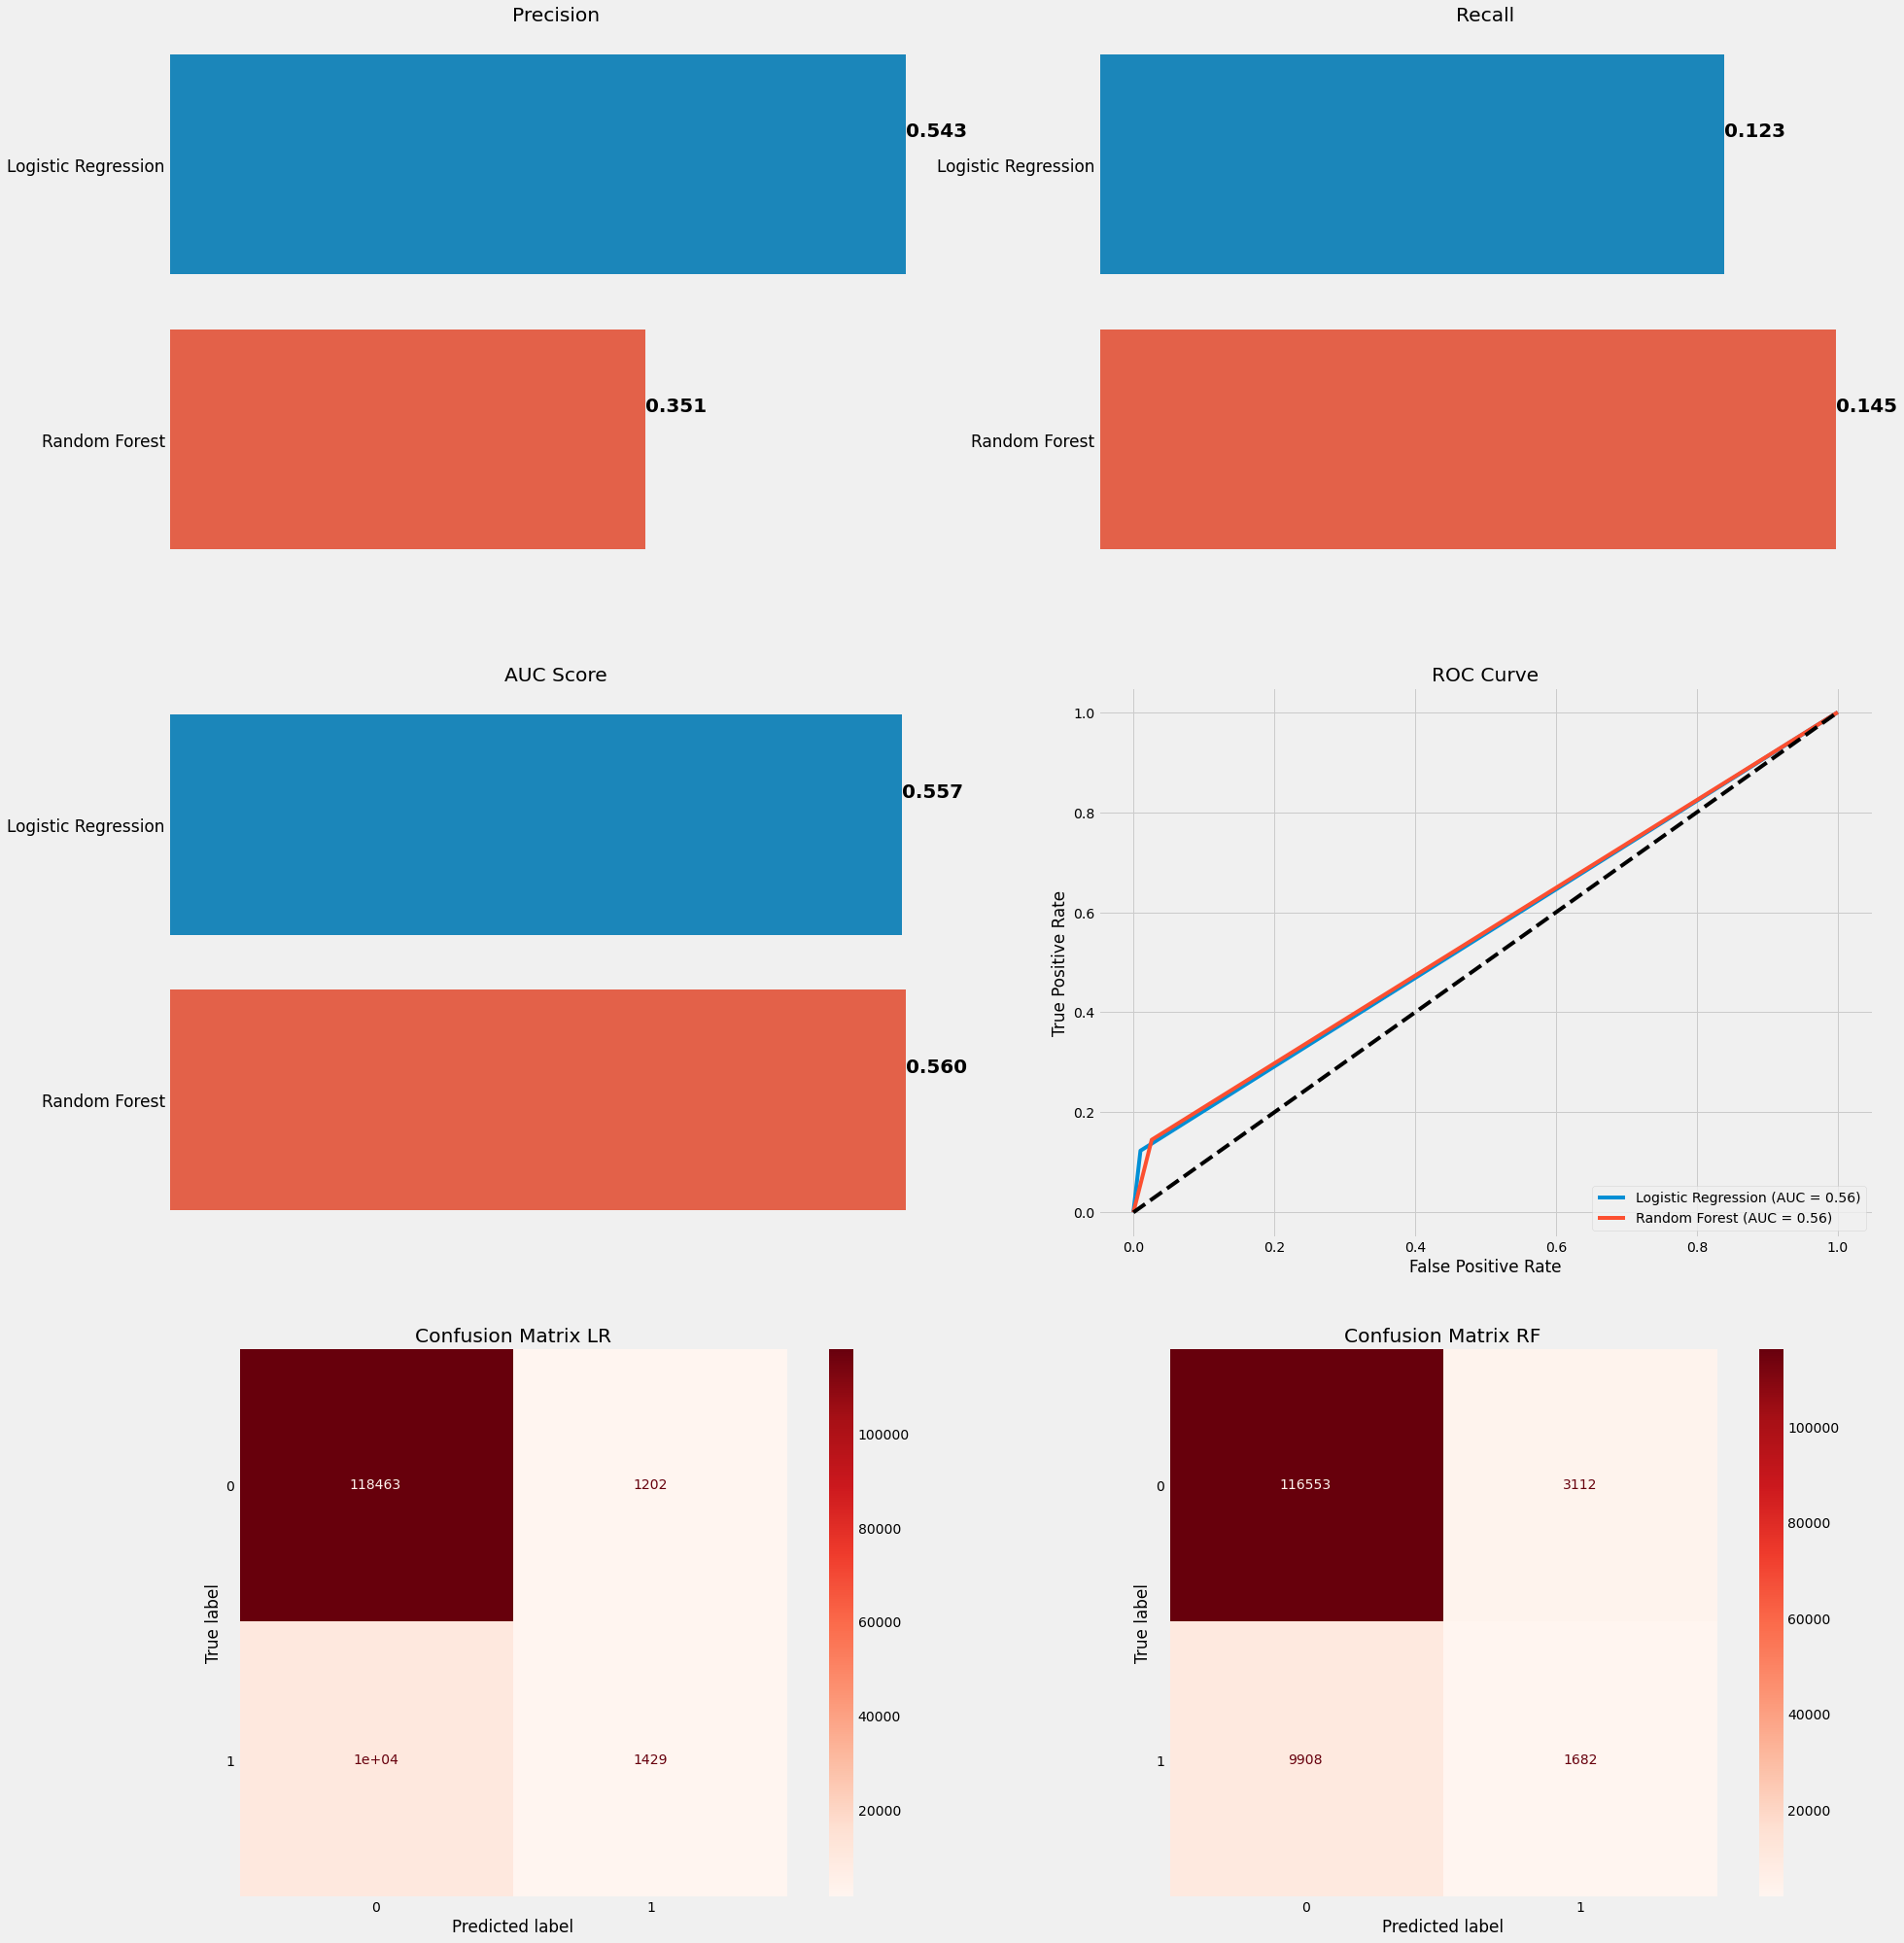

In [132]:
%%time
model_evaluation(X_train2, y_train2, X_test2, y_test2)
plt.savefig('Experimen2.png', bbox_inches='tight')

Best parameters :  {'penalty': 'l2', 'C': 0.001}
Precision =  0.562
Recall =  0.098
AUC =  0.545
CPU times: user 1min 27s, sys: 41.2 s, total: 2min 8s
Wall time: 22.9 s


<Figure size 864x720 with 0 Axes>

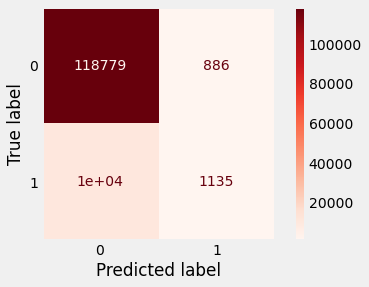

In [133]:
%%time
# Apply function for Logistic Regression
hyperparameter_lr(X_train2, y_train2, X_test2, y_test2)

Best parameters :  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10}
Precision =  0.626
Recall =  0.053
AUC =  0.525
CPU times: user 36min 35s, sys: 44.6 s, total: 37min 20s
Wall time: 37min 21s


<Figure size 864x720 with 0 Axes>

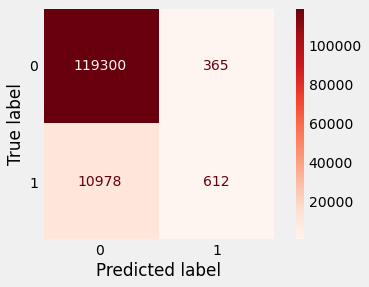

In [135]:
%%time
# Apply function for Random Forest
hyperparameter_rf(X_train2, y_train2, X_test2, y_test2)

## 3.3. Experiment 3 Under Sampling

CPU times: user 10.1 s, sys: 2.66 s, total: 12.8 s
Wall time: 6.73 s


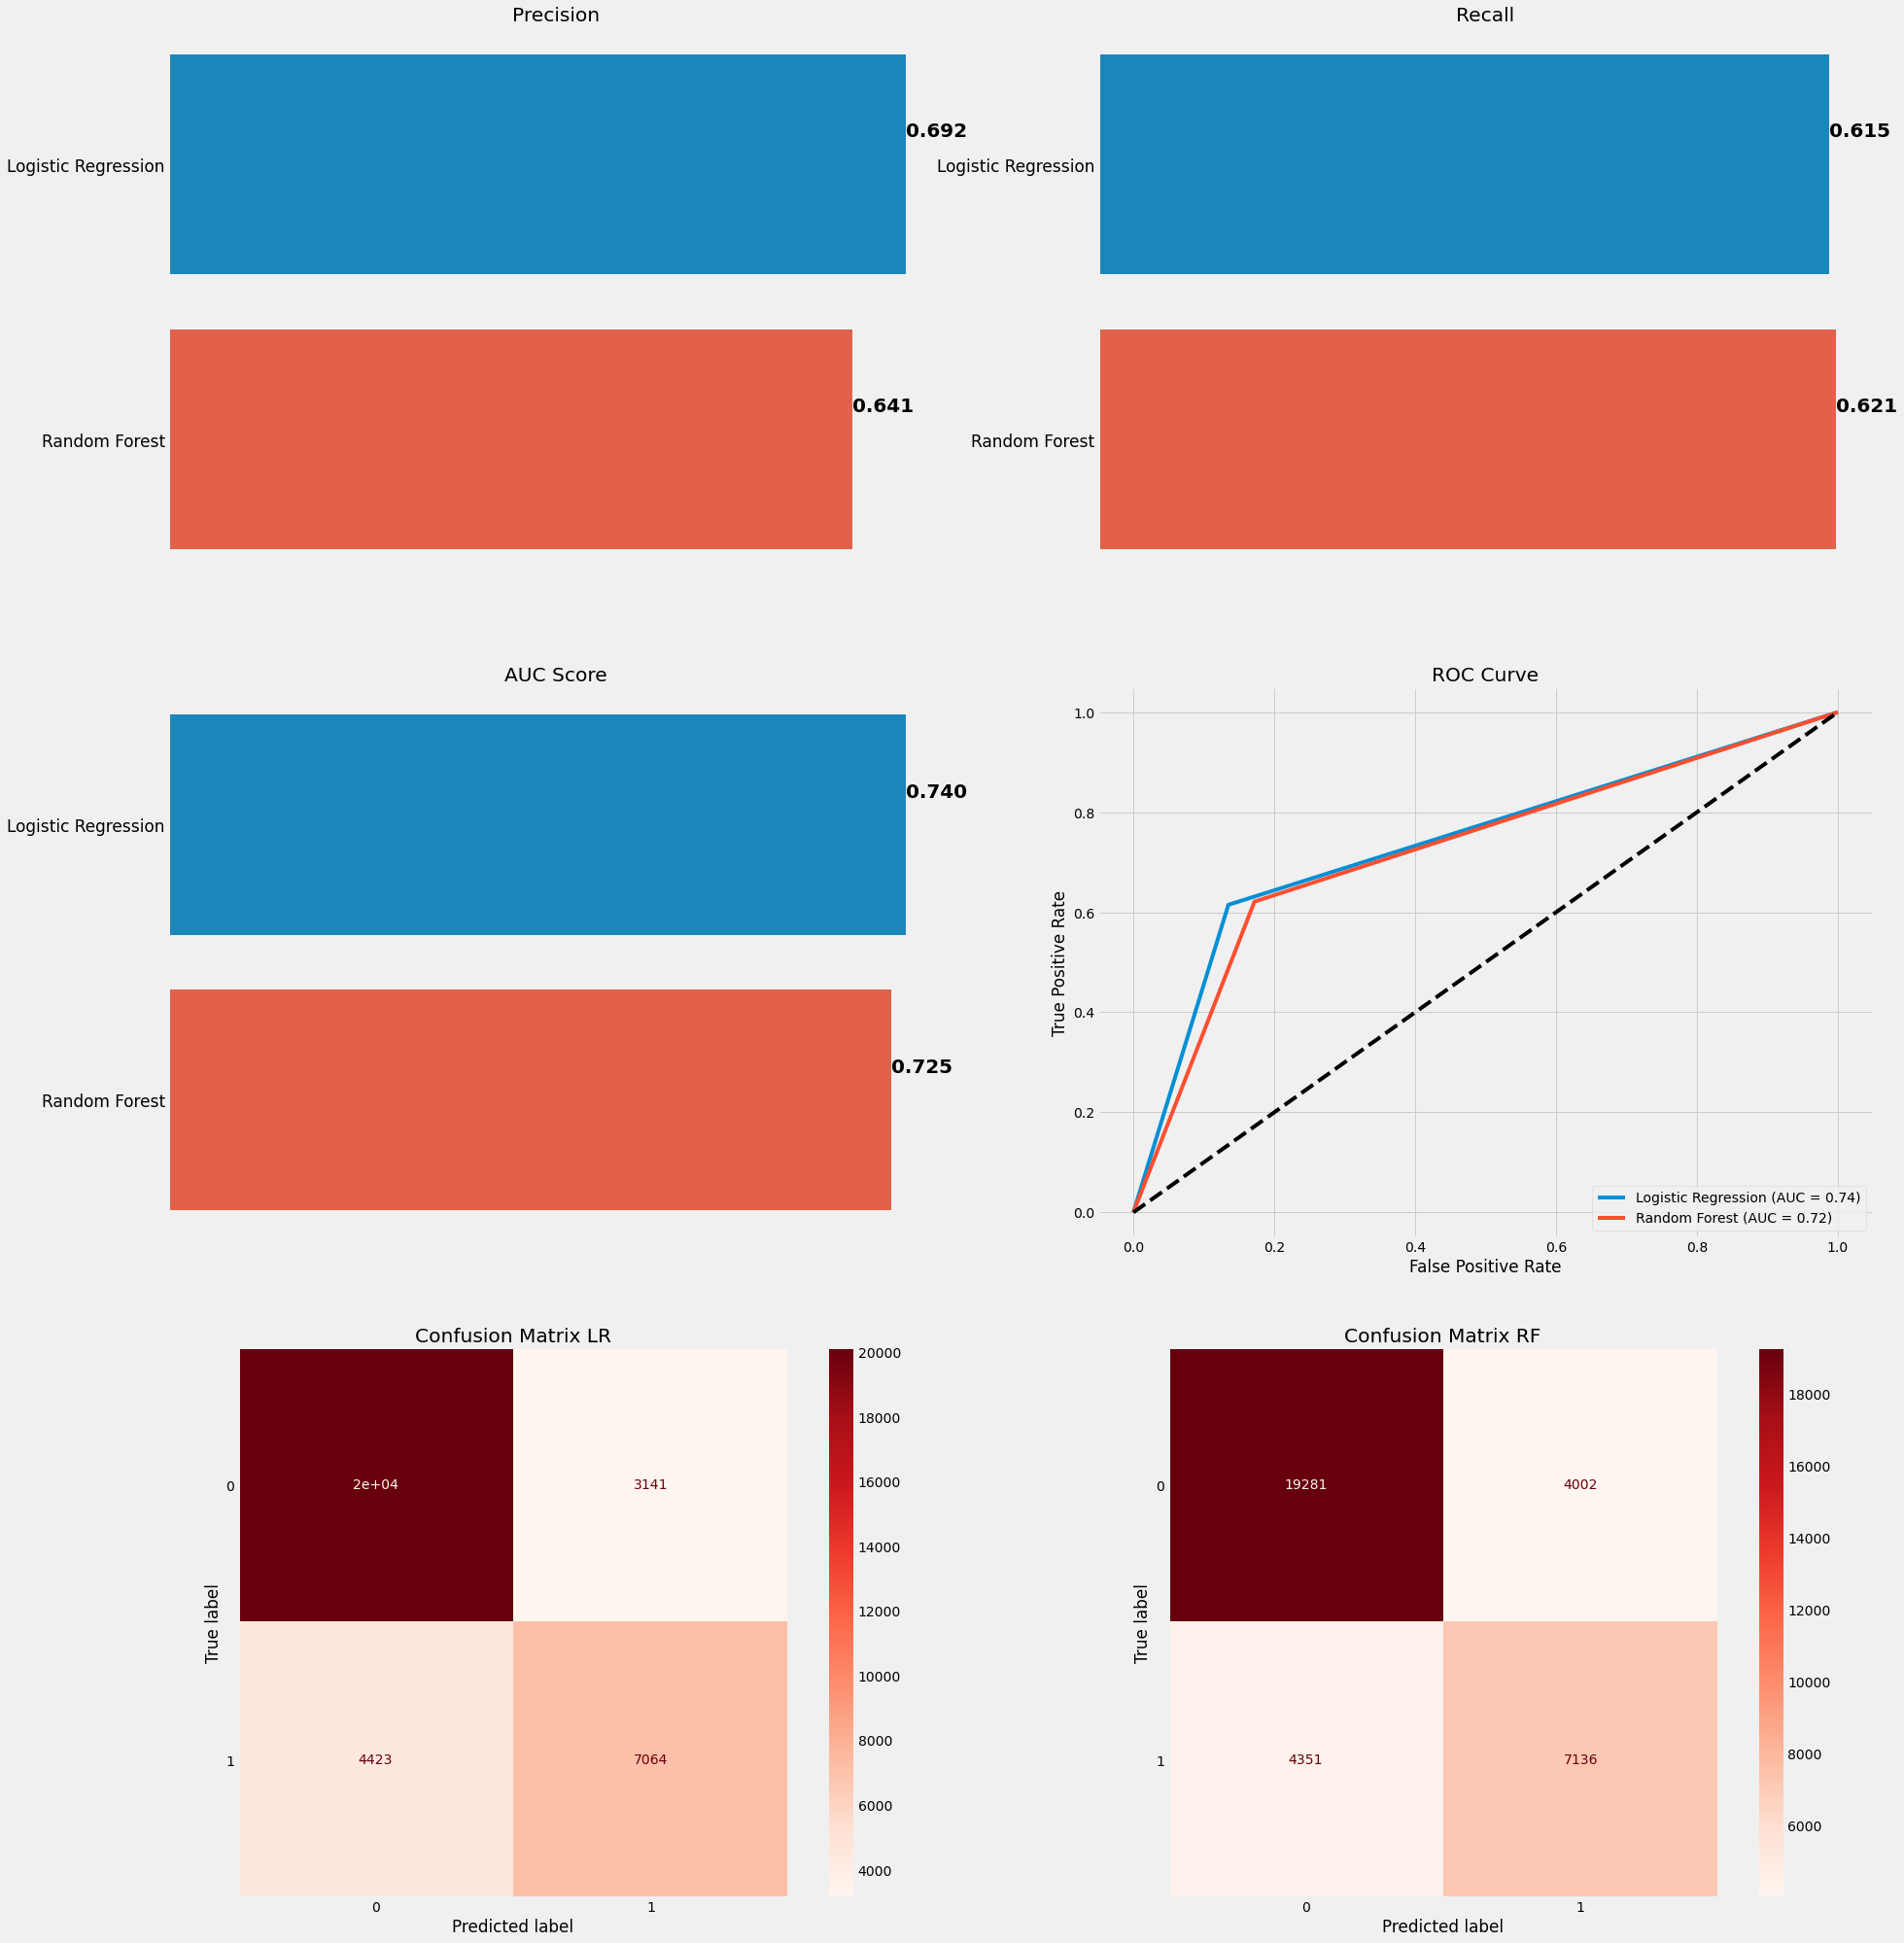

In [130]:
%%time
model_evaluation(X_train3_us, y_train3_us, X_test3_us, y_test3_us)
plt.savefig('Experimen3_RUS.png', bbox_inches='tight')

Precision =  0.695
Recall =  0.61
AUC =  0.739
CPU times: user 37.8 s, sys: 20.8 s, total: 58.7 s
Wall time: 7.59 s


<Figure size 720x576 with 0 Axes>

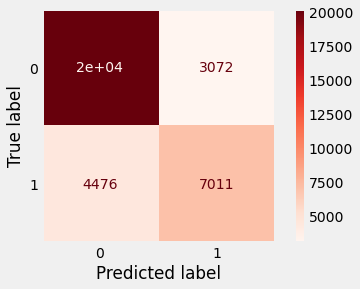

In [107]:
%%time
# Apply function for Logistic Regression
hyperparameter_lr(X_train3_us, y_train3_us, X_test3_us, y_test3_us)

Precision =  0.692
Recall =  0.62
AUC =  0.742
CPU times: user 14min 20s, sys: 40.6 s, total: 15min
Wall time: 15min


<Figure size 720x576 with 0 Axes>

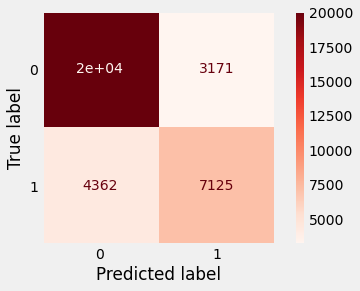

In [108]:
%%time
# Apply function for Random Forest
hyperparameter_rf(X_train3_us, y_train3_us, X_test3_us, y_test3_us)

## 3.4. Experiment 4 Over Sampling

CPU times: user 42.6 s, sys: 6.46 s, total: 49.1 s
Wall time: 36.1 s


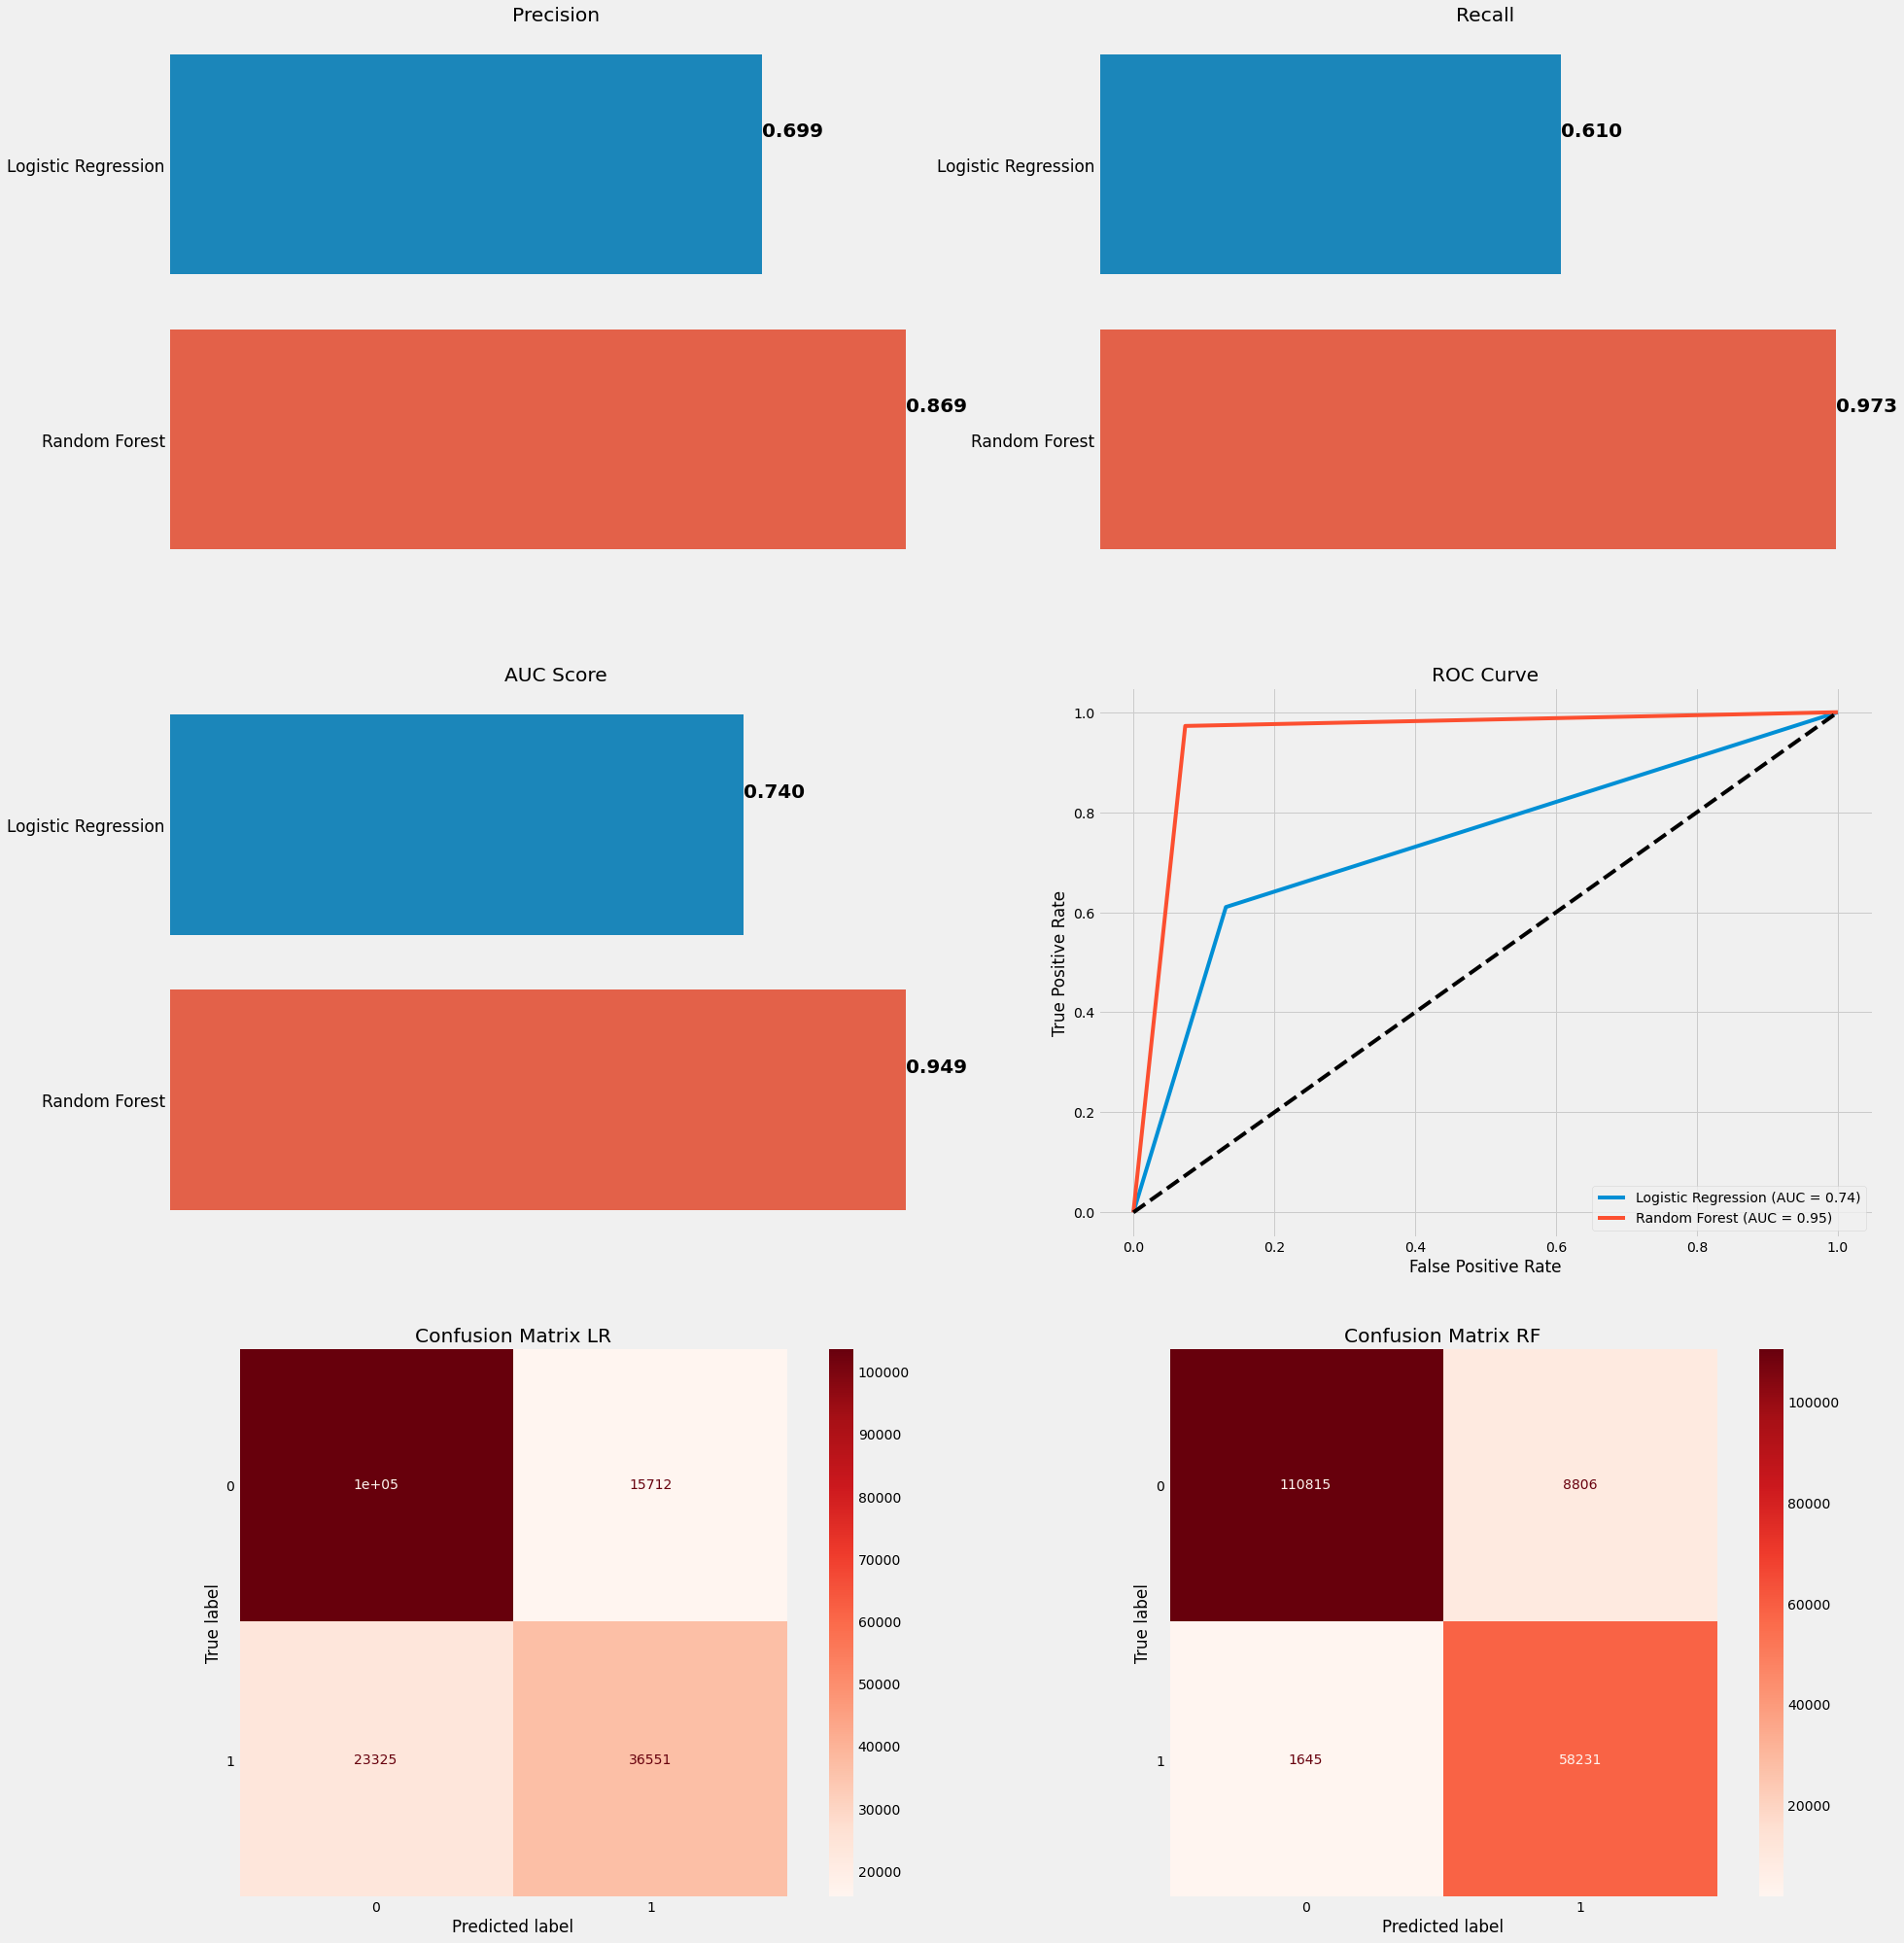

In [109]:
%%time
model_evaluation(X_train3_os, y_train3_os, X_test3_os, y_test3_os)

In [102]:
# Create feature importance for Random Forest
rf = RandomForestClassifier(random_state=42) # define Random Forest Classifier
rf.fit(X_train3_os, y_train3_os) # fit the model

y_pred_rf= rf.predict(X_test3_os)

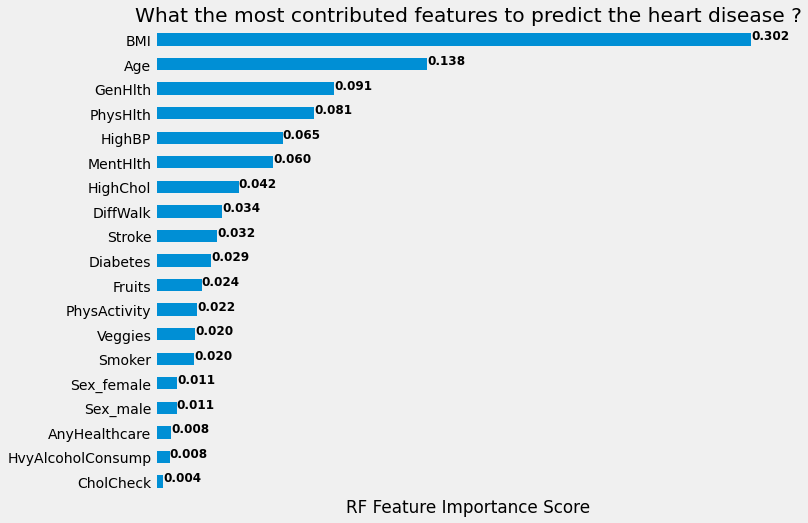

In [120]:
# define feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X_train3_os.columns)
# plot feature importance
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

# Annotate scores in bar
for p in ax.patches:
        value = format(p.get_width(), '.3f') 
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height() / 2 
        ax.annotate(value, (x, y), size = 12, weight='bold')
    
plt.xlabel('RF Feature Importance Score'); 
plt.xticks([],[]);
plt.grid(False);
plt.title('What the most contributed features to predict the heart disease ?');
plt.savefig('FI.png', bbox_inches='tight')

Precision =  0.7
Recall =  0.61
AUC =  0.739
CPU times: user 3min 6s, sys: 1min 48s, total: 4min 55s
Wall time: 46.3 s


<Figure size 720x576 with 0 Axes>

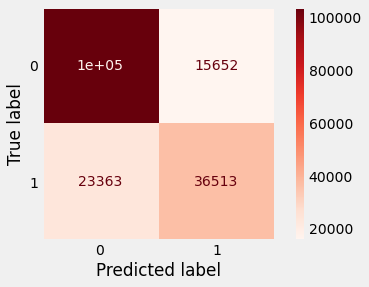

In [110]:
%%time
# Apply function for Logistic Regression
hyperparameter_lr(X_train3_os, y_train3_os, X_test3_os, y_test3_os)

Precision =  0.703
Recall =  0.638
AUC =  0.752
CPU times: user 57min 54s, sys: 1min 46s, total: 59min 41s
Wall time: 1h 39min 52s


<Figure size 720x576 with 0 Axes>

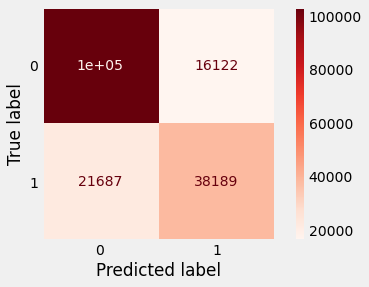

In [118]:
%%time
# Apply function for Random Forest
hyperparameter_rf(X_train3_os, y_train3_os, X_test3_os, y_test3_os)

## 3.5. Experiment 5 SMOTE

CPU times: user 1min 2s, sys: 8.07 s, total: 1min 10s
Wall time: 51.5 s


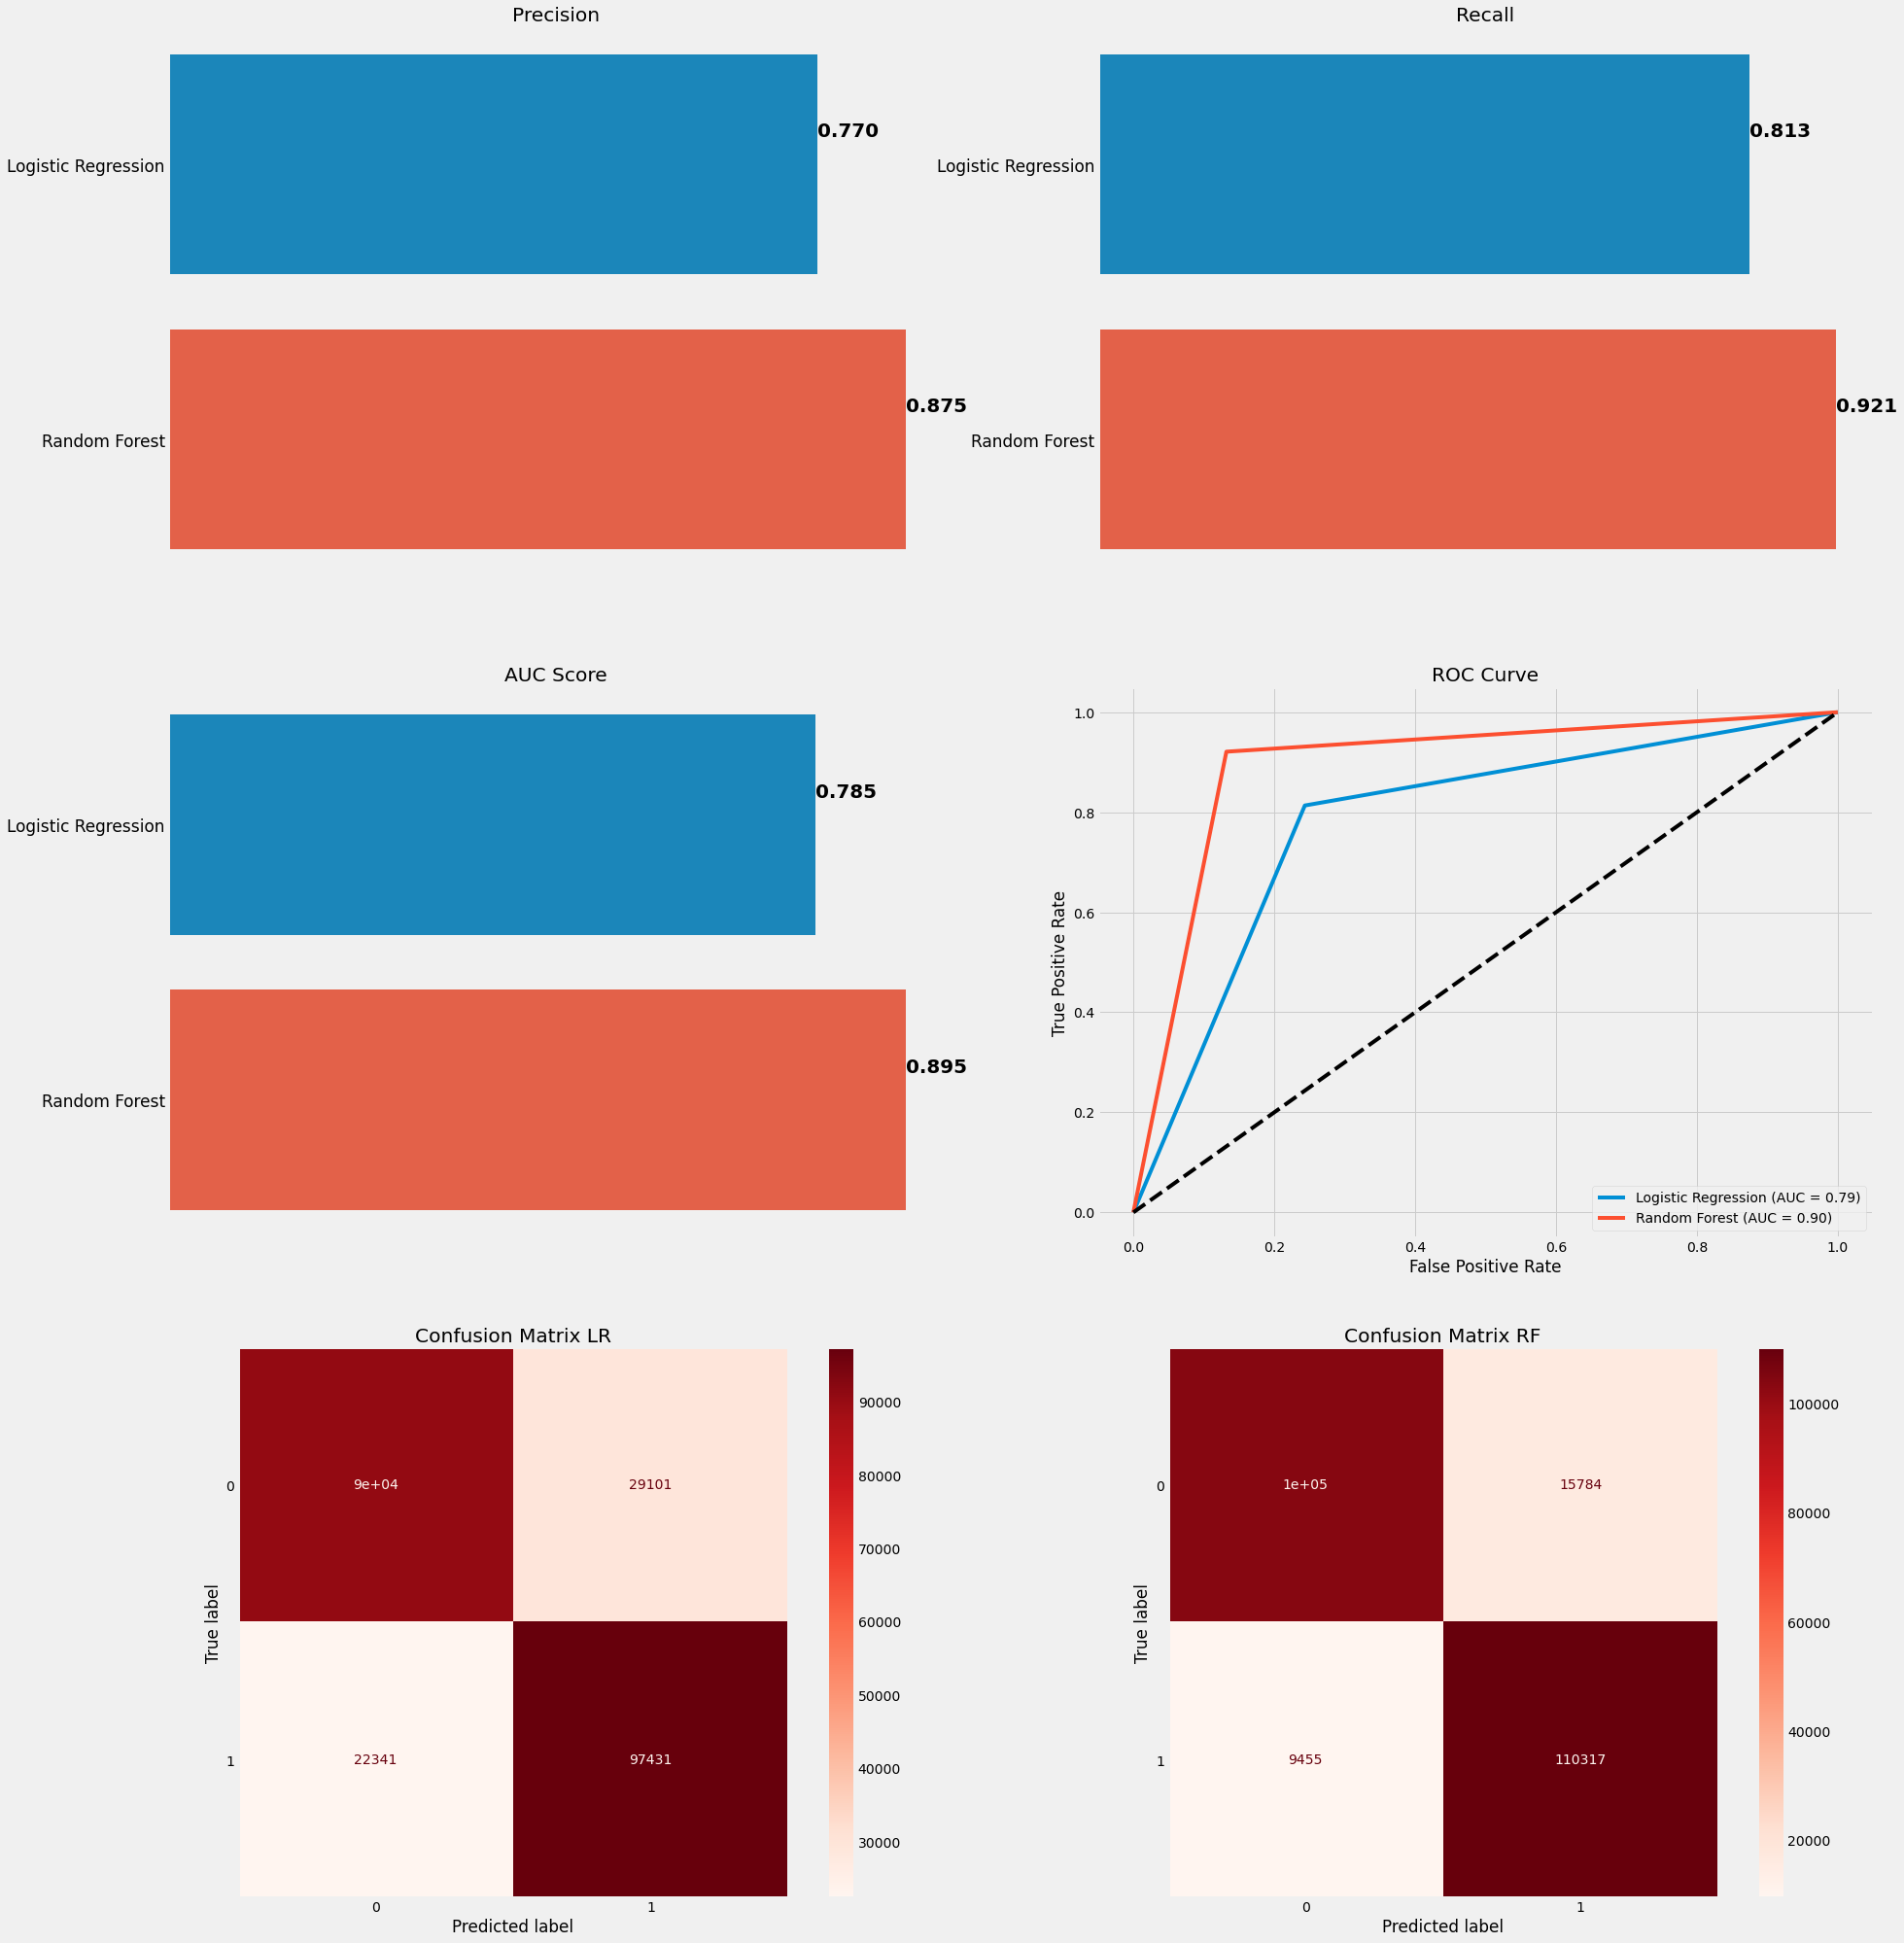

In [115]:
%%time
model_evaluation(X_train3_smt, y_train3_smt, X_test3_smt, y_test3_smt)

Precision =  0.769
Recall =  0.816
AUC =  0.785
CPU times: user 4min 42s, sys: 2min 18s, total: 7min 1s
Wall time: 55.3 s


<Figure size 720x576 with 0 Axes>

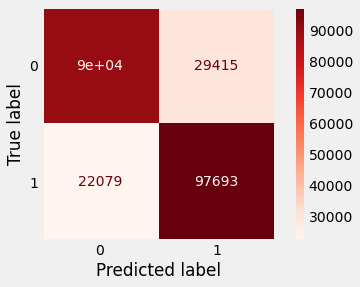

In [116]:
%%time
# Apply function for Logistic Regression
hyperparameter_lr(X_train3_smt, y_train3_smt, X_test3_smt, y_test3_smt)

In [ ]:
%%time
# Apply function for Logistic Regression
hyperparameter_rf(X_train3_smt, y_train3_smt, X_test3_smt, y_test3_smt)

In [121]:
# create feature importance for Logistic Regression
lr = LogisticRegression(random_state=42)     # define logistic regression 
# Fit train data
lr.fit(X_train3_smt, y_train3_smt) 
# Predict the response for a new observation
y_pred_lr= lr.predict(X_test3_smt) 
 

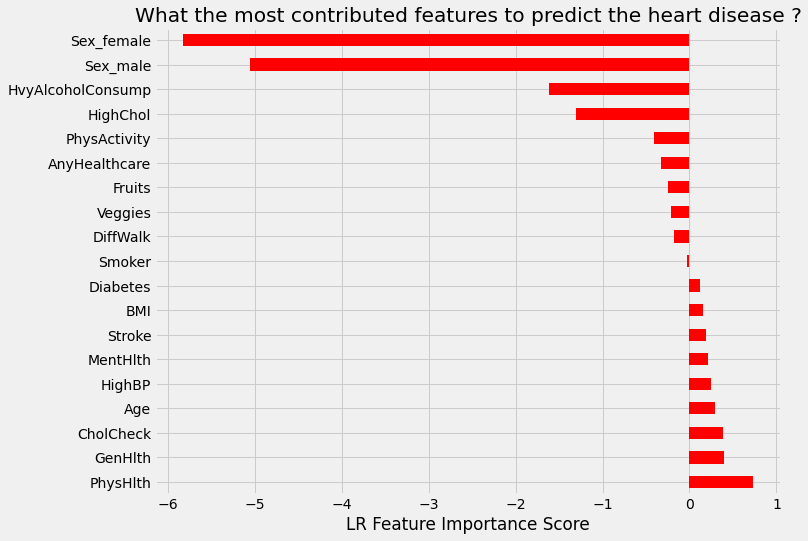

In [129]:
importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,index=X_train3_smt.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance',figsize=(10, 8), color='r')

plt.xlabel('LR Feature Importance Score');
plt.title('What the most contributed features to predict the heart disease ?');
plt.savefig('FI_LR.png', bbox_inches='tight')